In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import deque

In [2]:
def plot_hist(hist, bins):
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()

In [72]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [73]:
public_index = np.load("../input/public_LB.npy")
private_index = np.load("../input/private_LB.npy")
synthetic_index = np.load("../input/synthetic_samples_indexes.npy")

In [74]:
BINS=1000
train_labels = train_df["target"]

In [75]:
train_df.drop(['ID_code', 'target'], axis=1, inplace=True)
test_df.drop(['ID_code'], axis=1, inplace=True)

Column var_12


C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


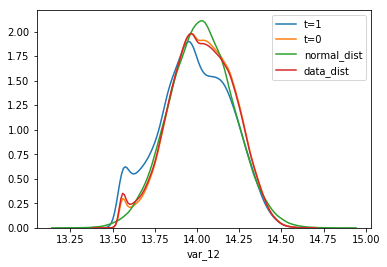

Column var_13


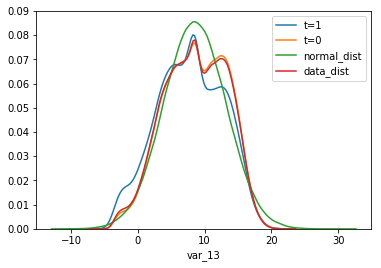

Column var_108


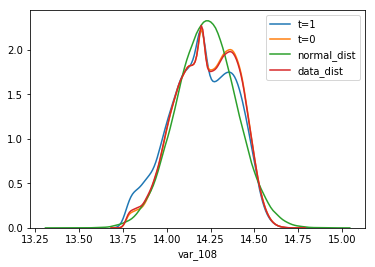

Column var_126


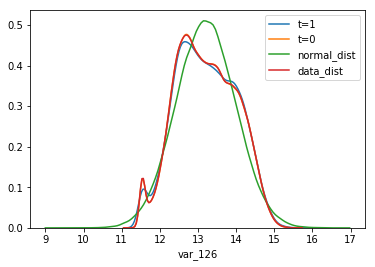

Column var_68


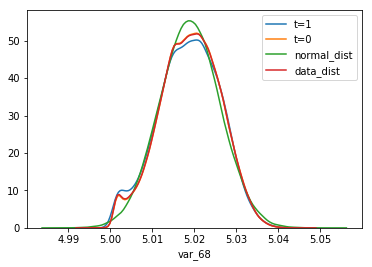

In [8]:
for var in ['var_12','var_13','var_108','var_126','var_68']:
    print("Column {}".format(var))
    plt.plot()
    normal_data = train_df[var].mean() + train_df[var].std()*np.random.randn(len(train_df))
    bins, _ = np.histogram(train_df[var],bins='fd')
    sns.distplot(train_df[train_labels==1][var], label="t=1", bins=len(bins), hist=False)
    sns.distplot(train_df[train_labels==0][var], label="t=0", bins=len(bins), hist=False)
    sns.distplot(normal_data, label="normal_dist", bins=len(bins), hist=False)
    sns.distplot(train_df[var], label="data_dist", bins=len(bins), hist=False)
    plt.legend()
    plt.show()

In [9]:
def pad_bins(hist, bins):
    hist = deque(hist)
    bins = deque(bins)
    hist.appendleft(0)
    hist.append(0)
    bins.appendleft(-np.inf)
    bins.append(np.inf)
    return np.array(hist), np.array(bins)

In [10]:
def create_features(train_df, test_df, columns):
    for col in columns:
        hist, bins = np.histogram(train_df[col],bins='fd')
        n_bins=len(hist)
        hist, bins = pad_bins(hist, bins)
        
        train_df[col+"_freq"] = [hist[np.searchsorted(bins,x)-1] for x in train_df[col]]
        test_df[col+"_freq"] = [hist[np.searchsorted(bins,x)-1] for x in test_df[col]]

        np.random.seed(42); normal_data = train_df[col].mean() + train_df[col].std()*np.random.randn(len(train_df))
        normal_hist, normal_bins = np.histogram(normal_data,bins=n_bins)
        normal_hist, normal_bins = pad_bins(normal_hist, normal_bins)
        train_df[col+"_normal_freq"] = [normal_hist[np.searchsorted(normal_bins,x)-1] for x in train_df[col]]
        test_df[col+"_normal_freq"] = [normal_hist[np.searchsorted(normal_bins,x)-1] for x in test_df[col]]

        train_df[col+"_normal_distance"] = train_df[col+"_freq"] - train_df[col+"_normal_freq"]
        test_df[col+"_normal_distance"] = test_df[col+"_freq"] - test_df[col+"_normal_freq"]

        train_df.drop(columns=[col+"_freq", col+"_normal_freq"], inplace=True)
        test_df.drop(columns=[col+"_freq", col+"_normal_freq"], inplace=True)
    return train_df, test_df

In [11]:
train_df.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.7470   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  8.0851   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  5.9525   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  8.2450   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  7.6784   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [12]:
private_df, public_df, synthetic_df = test_df.iloc[private_index], test_df.iloc[public_index], test_df.iloc[synthetic_index]

Column var_0


C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


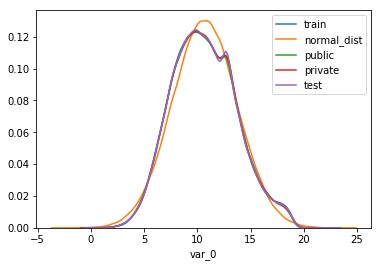

Column var_1


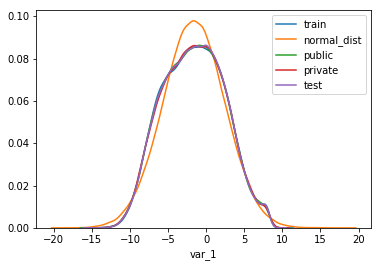

Column var_2


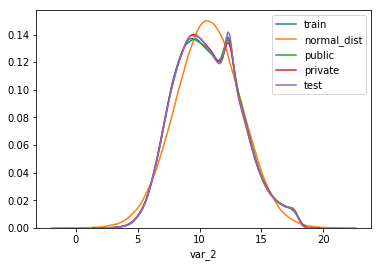

Column var_3


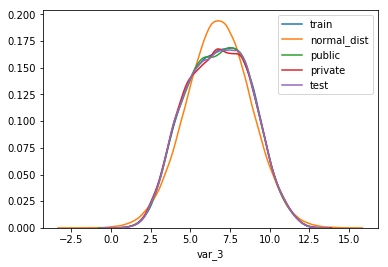

Column var_4


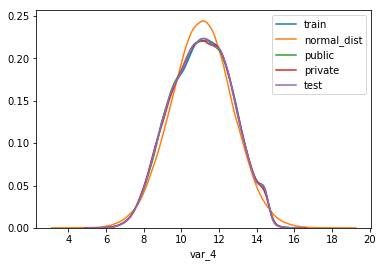

Column var_5


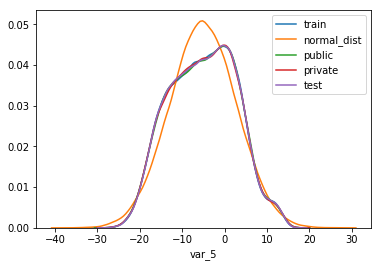

Column var_6


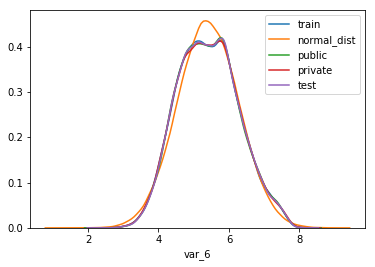

Column var_7


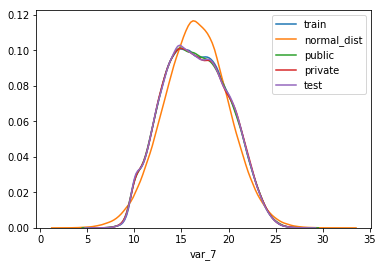

Column var_8


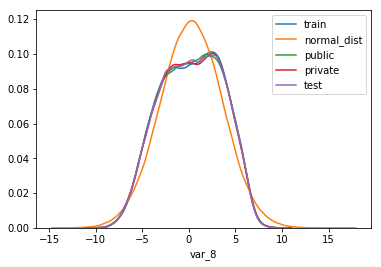

Column var_9


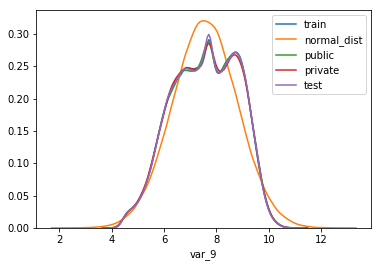

Column var_10


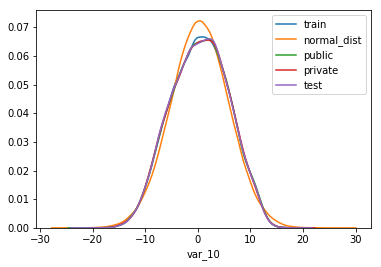

Column var_11


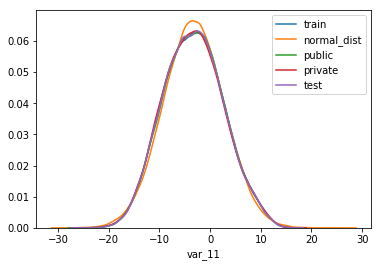

Column var_12


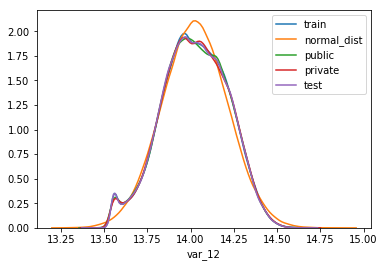

Column var_13


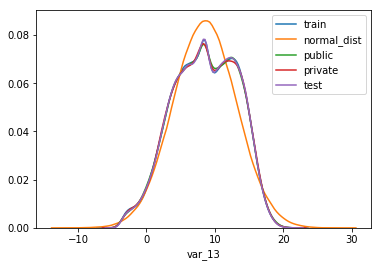

Column var_14


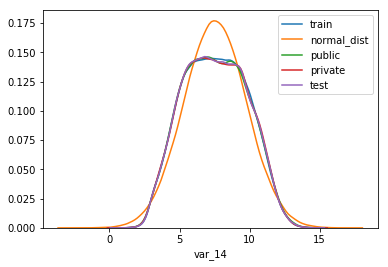

Column var_15


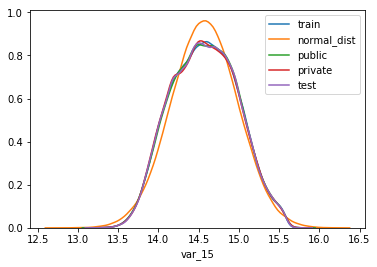

Column var_16


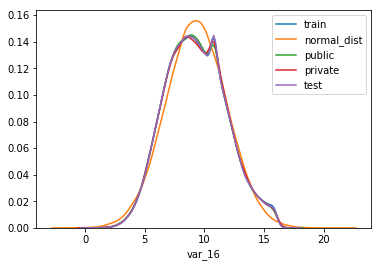

Column var_17


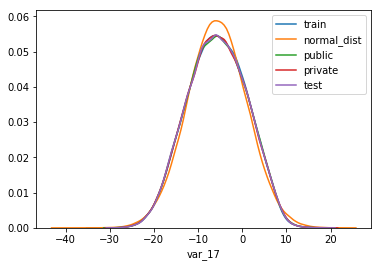

Column var_18


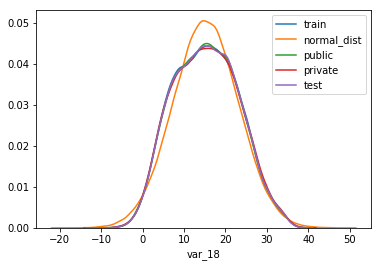

Column var_19


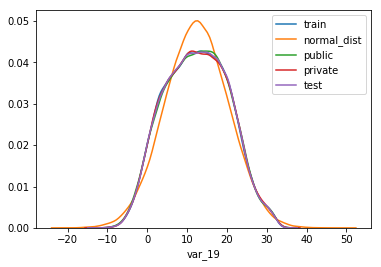

Column var_20


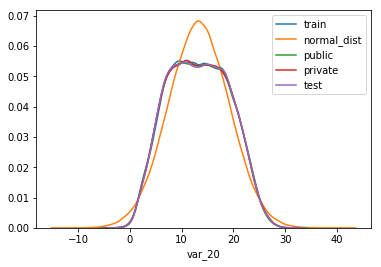

Column var_21


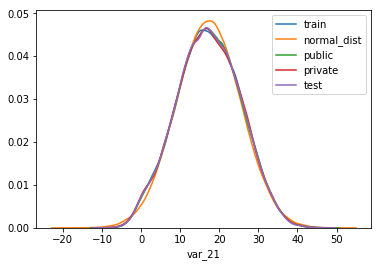

Column var_22


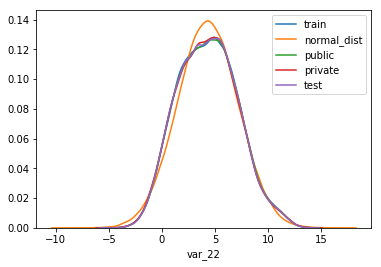

Column var_23


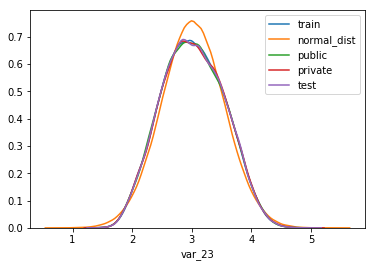

Column var_24


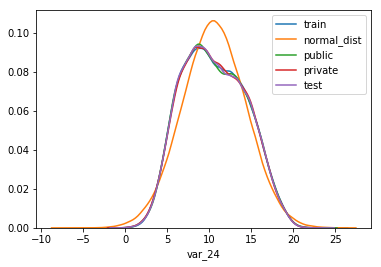

Column var_25


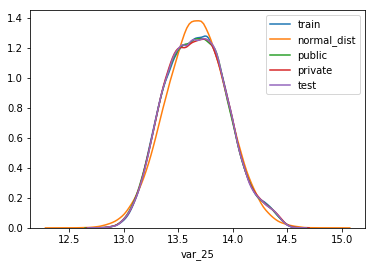

Column var_26


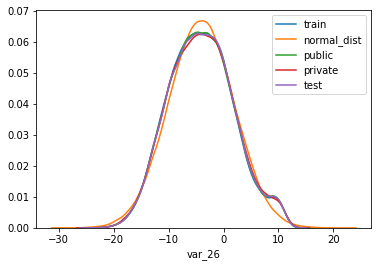

Column var_27


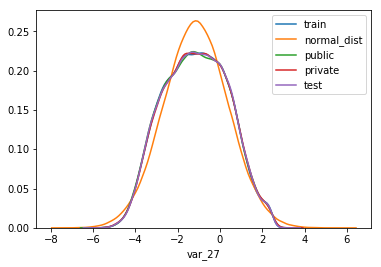

Column var_28


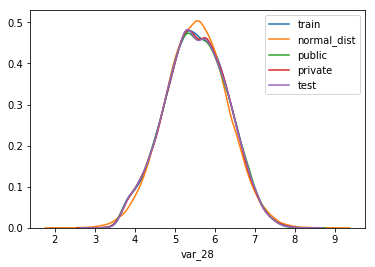

Column var_29


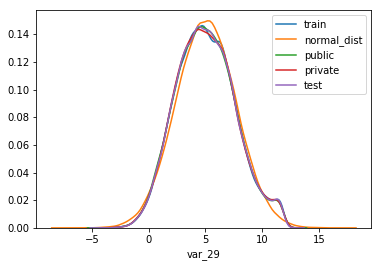

Column var_30


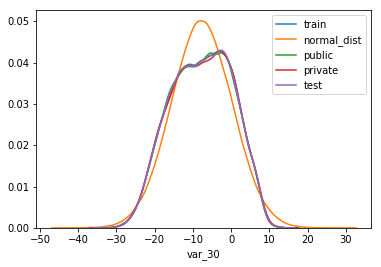

Column var_31


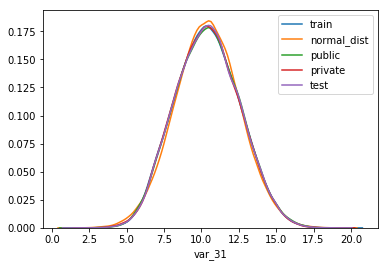

Column var_32


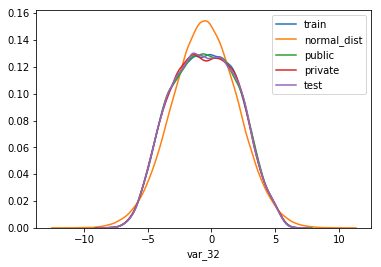

Column var_33


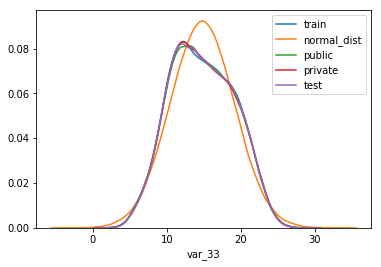

Column var_34


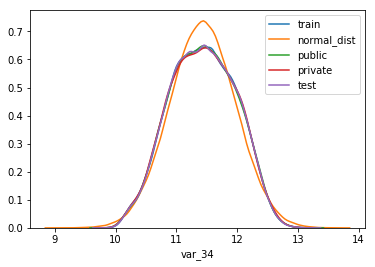

Column var_35


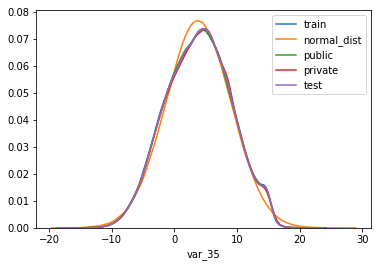

Column var_36


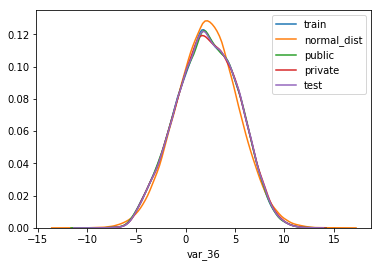

Column var_37


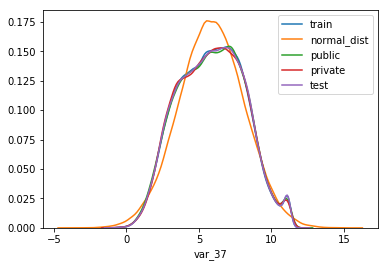

Column var_38


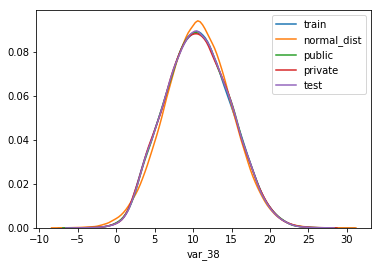

Column var_39


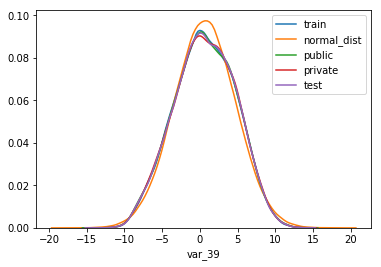

Column var_40


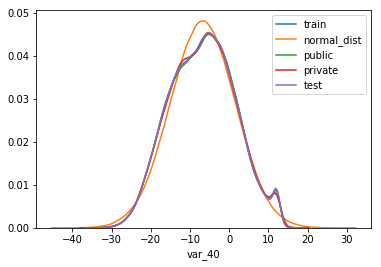

Column var_41


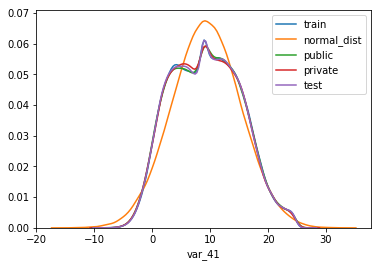

Column var_42


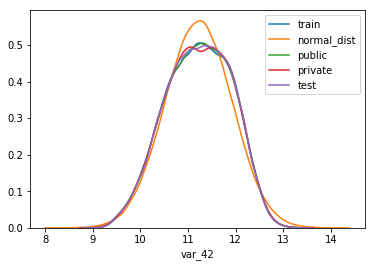

Column var_43


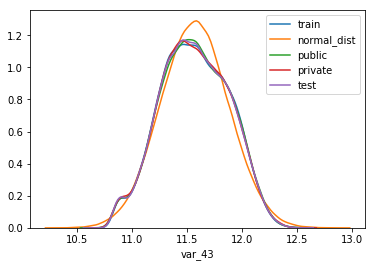

Column var_44


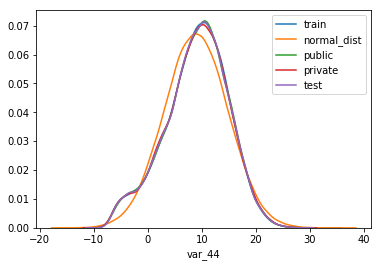

Column var_45


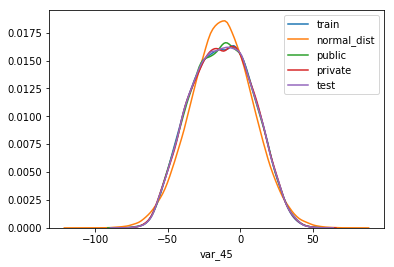

Column var_46


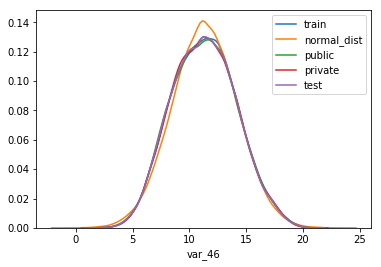

Column var_47


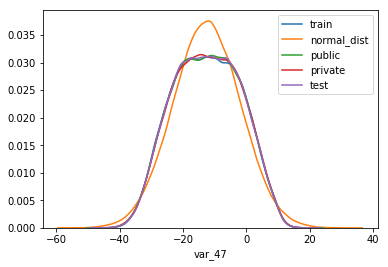

Column var_48


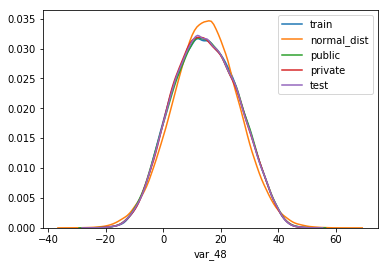

Column var_49


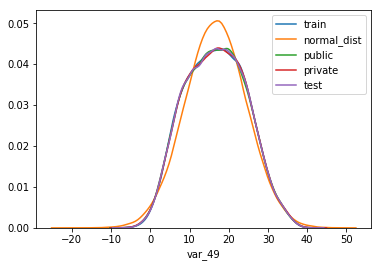

Column var_50


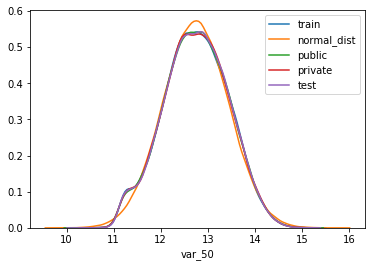

Column var_51


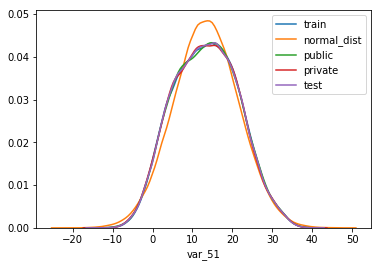

Column var_52


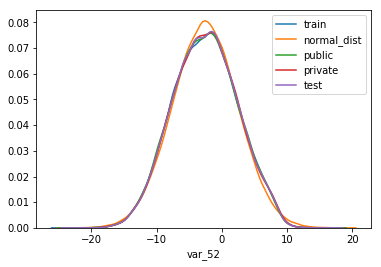

Column var_53


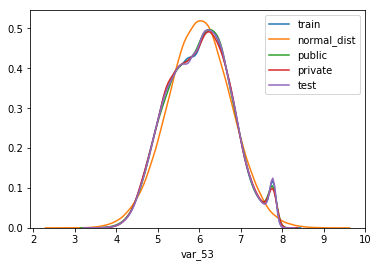

Column var_54


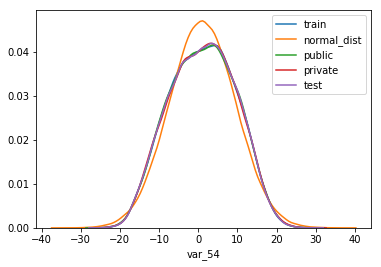

Column var_55


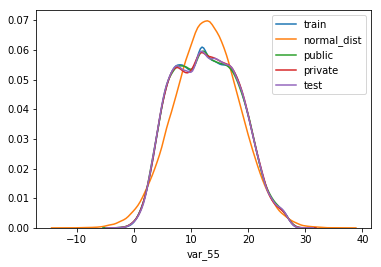

Column var_56


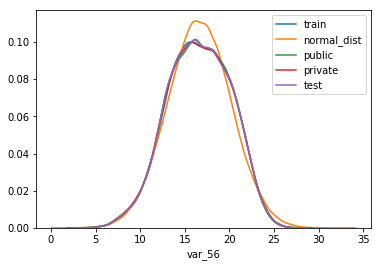

Column var_57


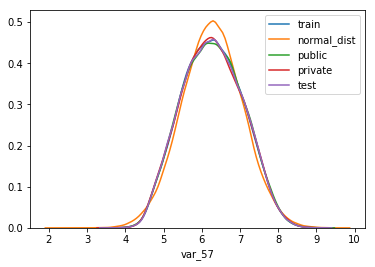

Column var_58


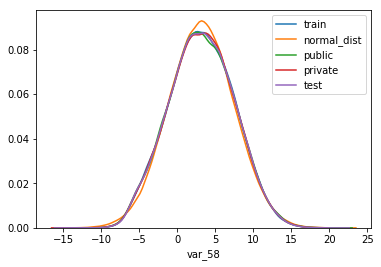

Column var_59


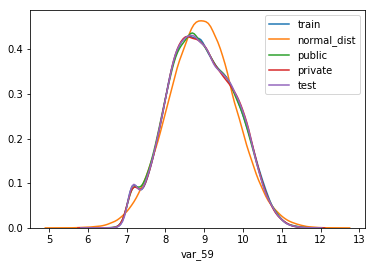

Column var_60


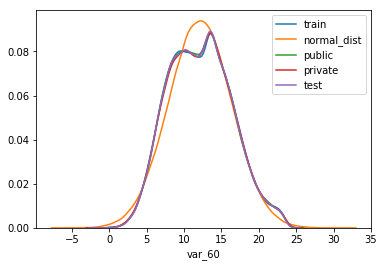

Column var_61


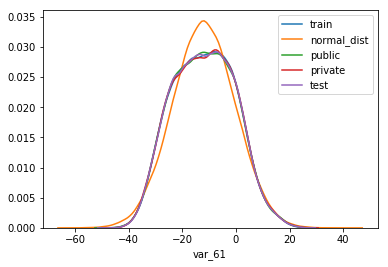

Column var_62


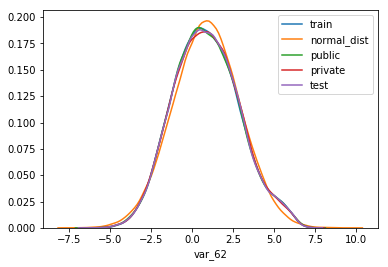

Column var_63


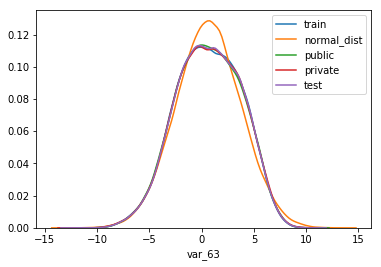

Column var_64


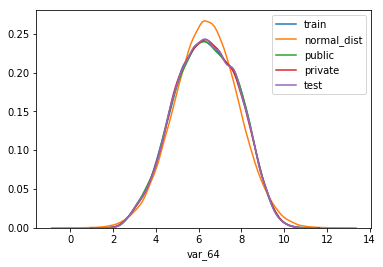

Column var_65


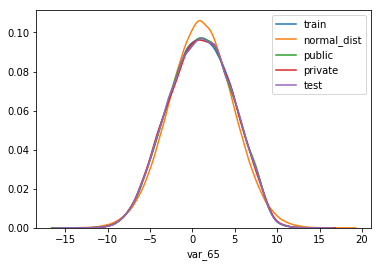

Column var_66


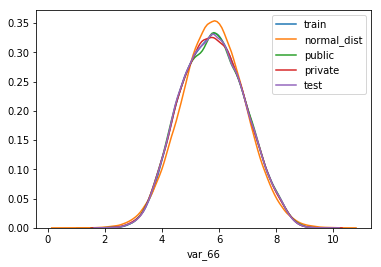

Column var_67


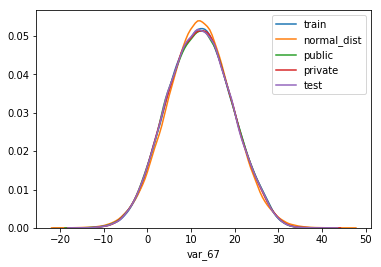

Column var_68


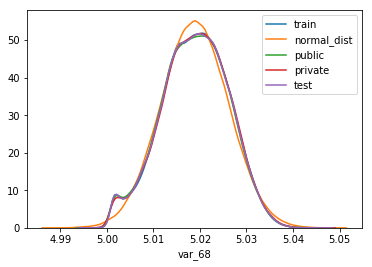

Column var_69


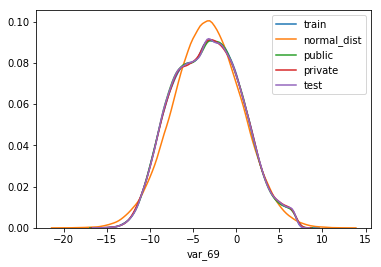

Column var_70


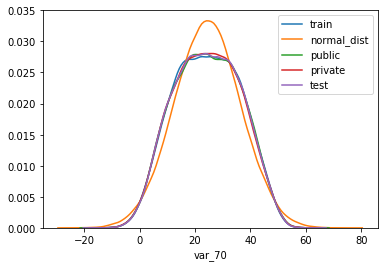

Column var_71


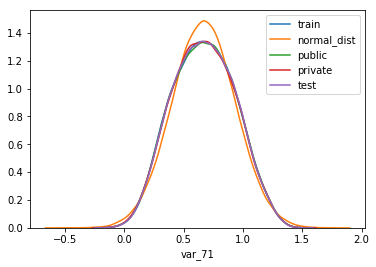

Column var_72


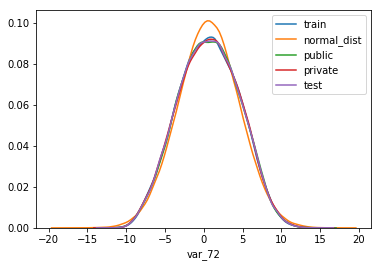

Column var_73


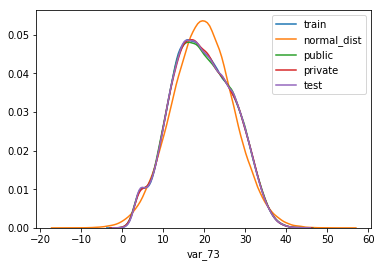

Column var_74


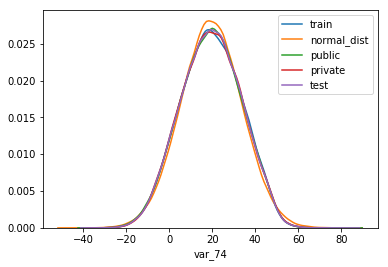

Column var_75


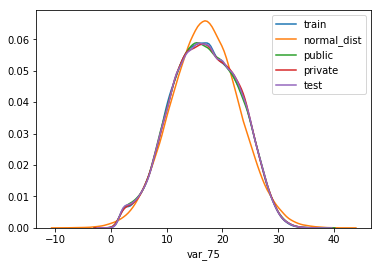

Column var_76


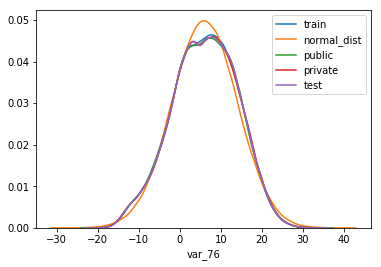

Column var_77


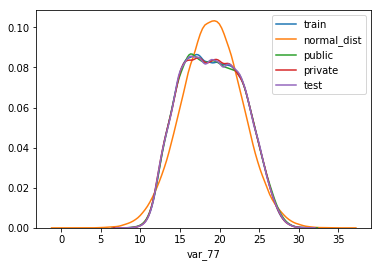

Column var_78


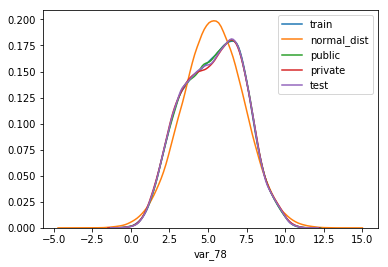

Column var_79


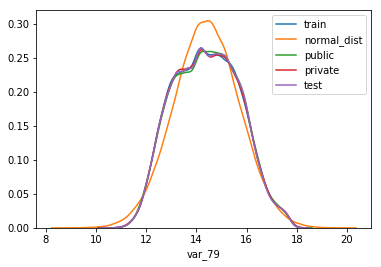

Column var_80


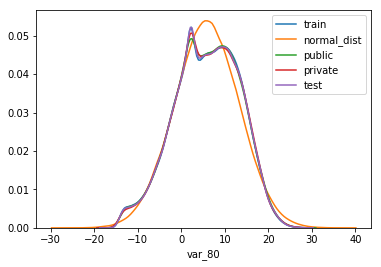

Column var_81


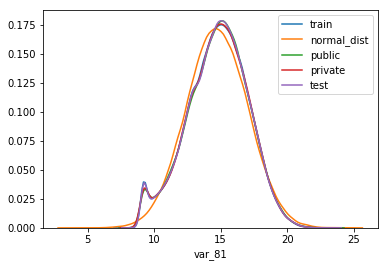

Column var_82


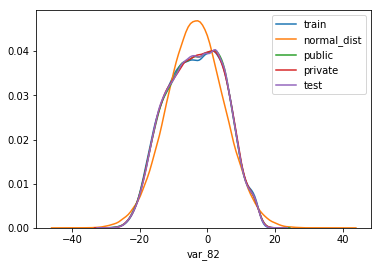

Column var_83


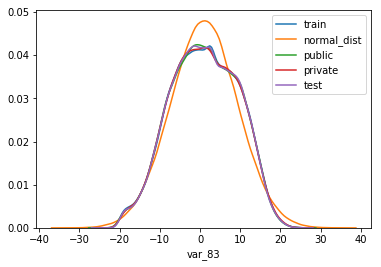

Column var_84


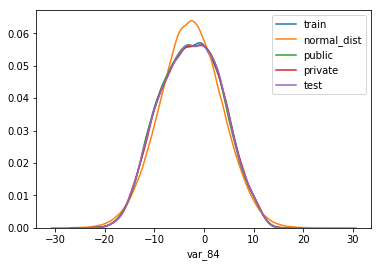

Column var_85


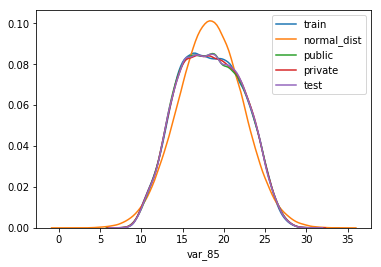

Column var_86


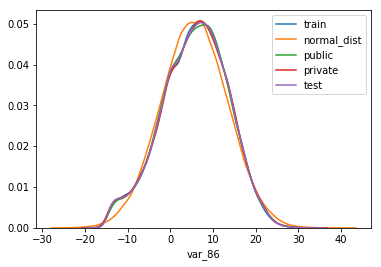

Column var_87


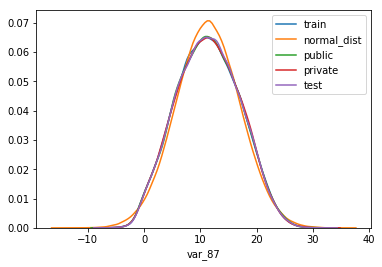

Column var_88


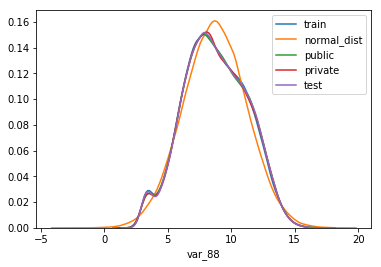

Column var_89


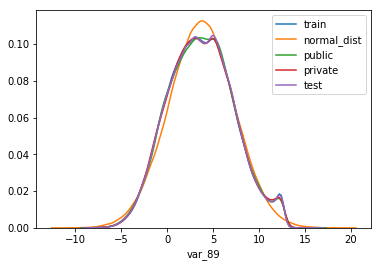

Column var_90


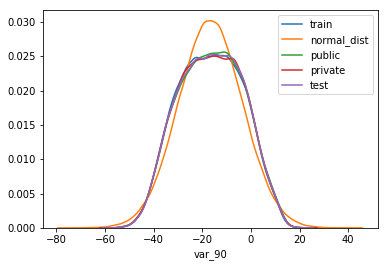

Column var_91


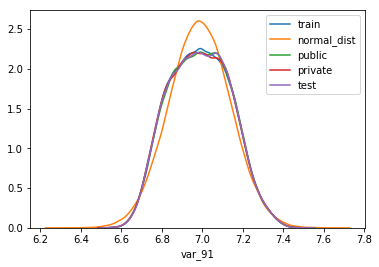

Column var_92


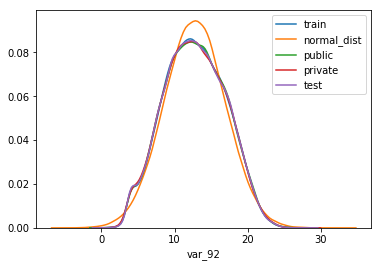

Column var_93


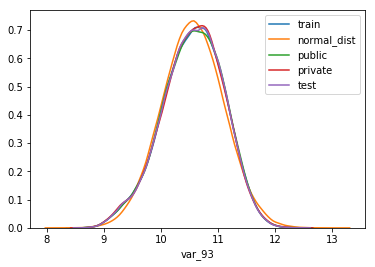

Column var_94


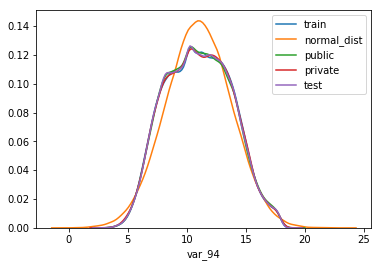

Column var_95


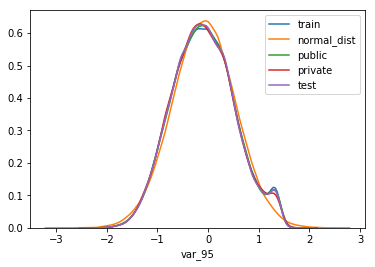

Column var_96


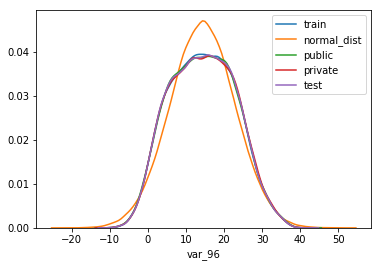

Column var_97


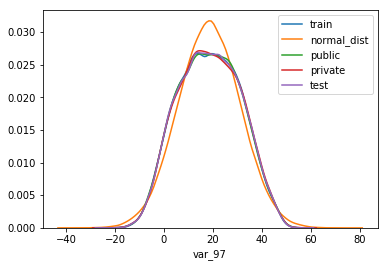

Column var_98


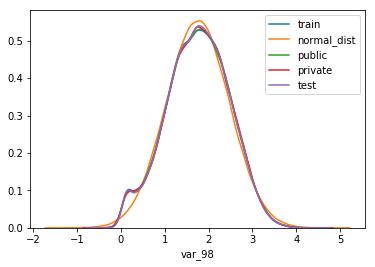

Column var_99


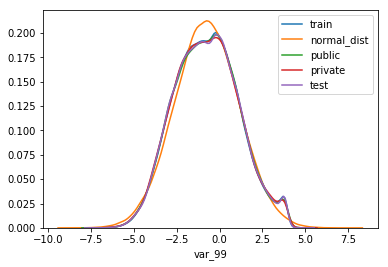

Column var_100


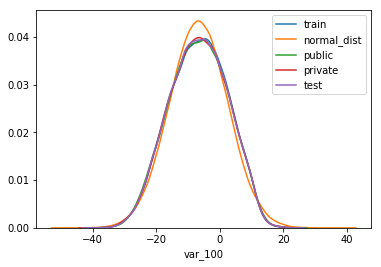

Column var_101


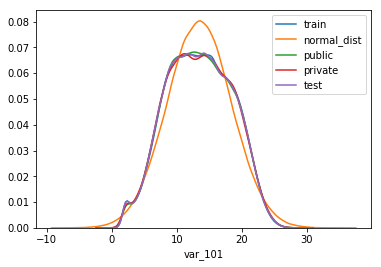

Column var_102


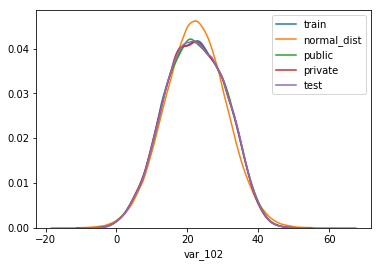

Column var_103


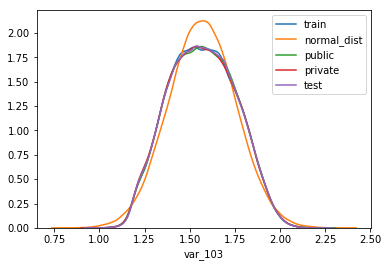

Column var_104


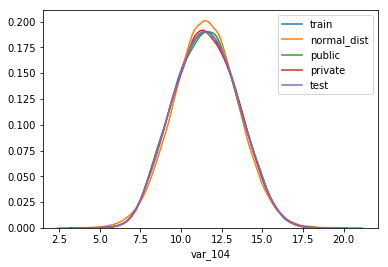

Column var_105


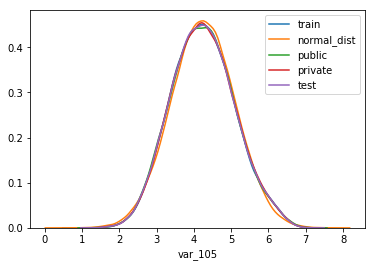

Column var_106


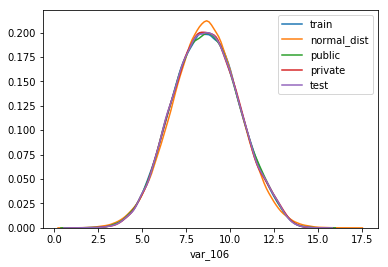

Column var_107


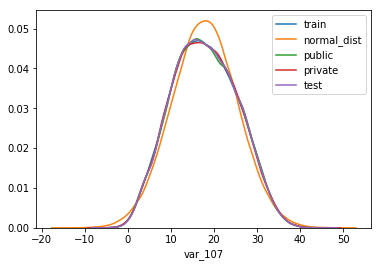

Column var_108


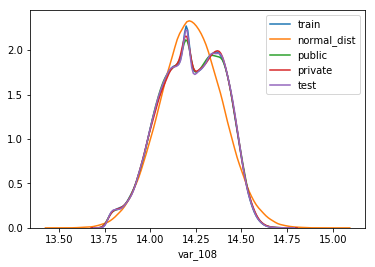

Column var_109


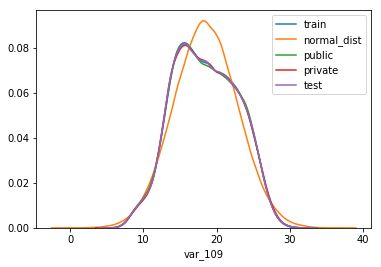

Column var_110


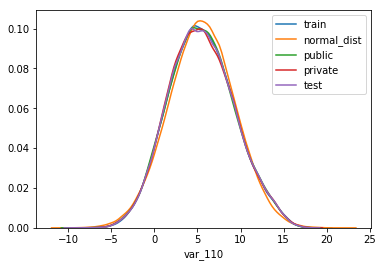

Column var_111


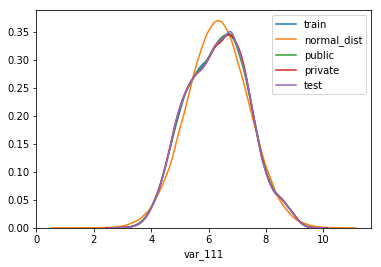

Column var_112


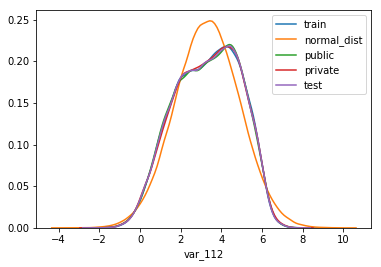

Column var_113


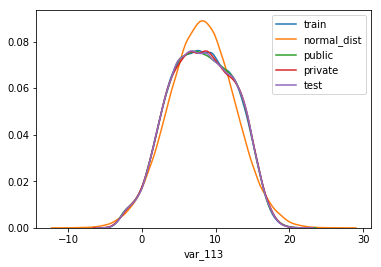

Column var_114


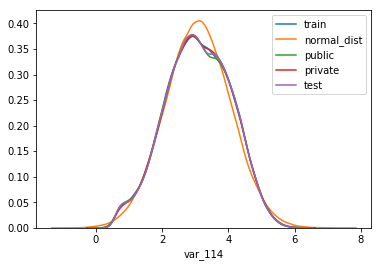

Column var_115


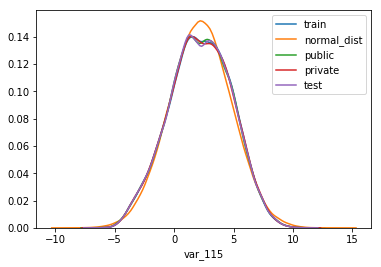

Column var_116


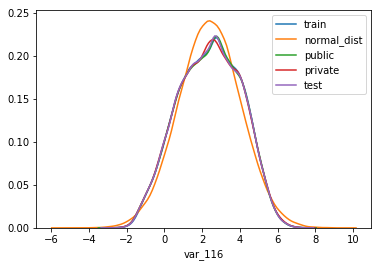

Column var_117


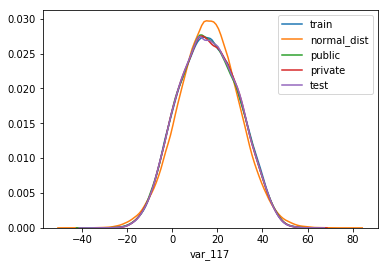

Column var_118


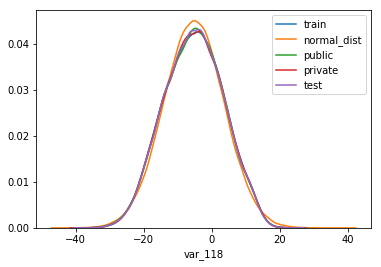

Column var_119


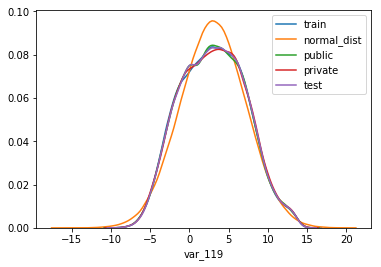

Column var_120


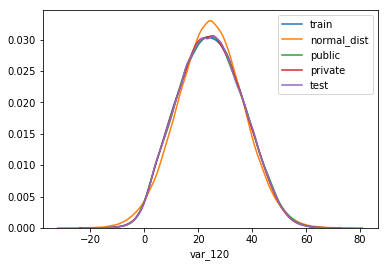

Column var_121


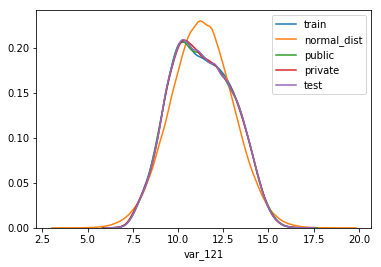

Column var_122


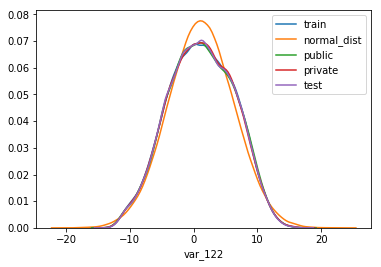

Column var_123


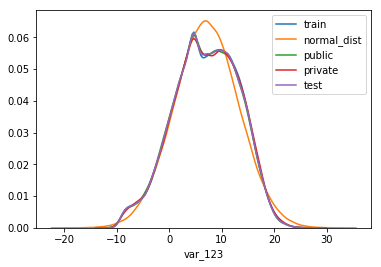

Column var_124


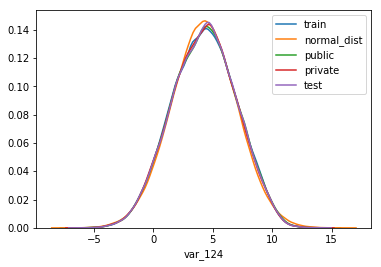

Column var_125


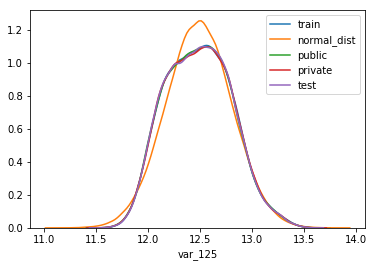

Column var_126


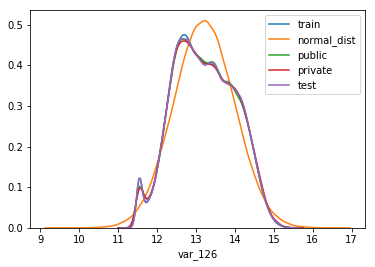

Column var_127


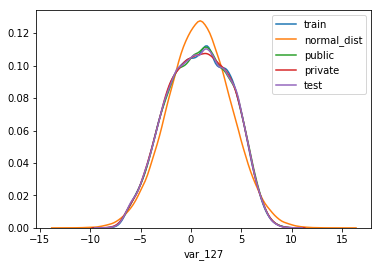

Column var_128


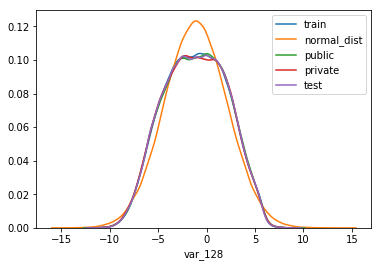

Column var_129


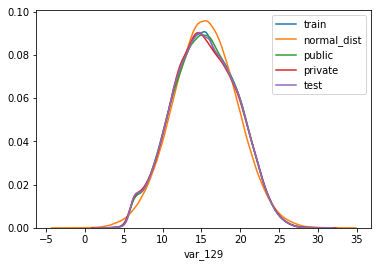

Column var_130


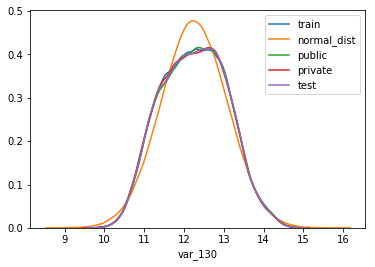

Column var_131


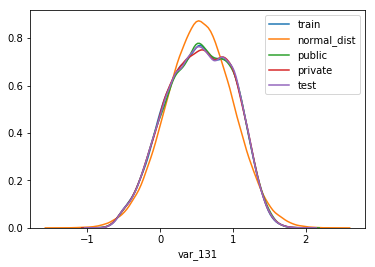

Column var_132


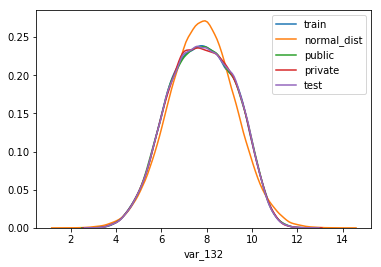

Column var_133


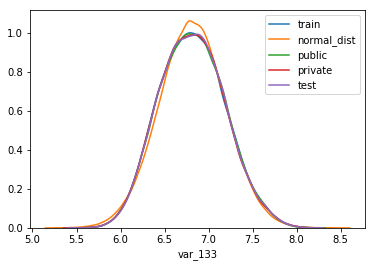

Column var_134


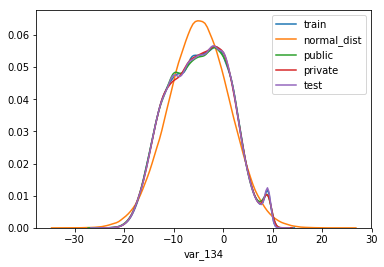

Column var_135


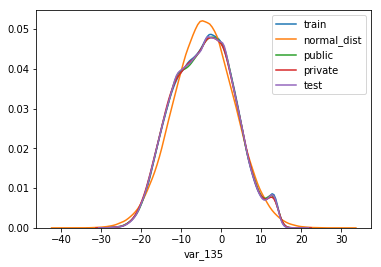

Column var_136


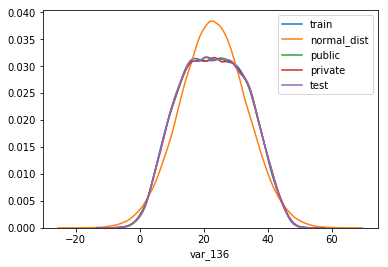

Column var_137


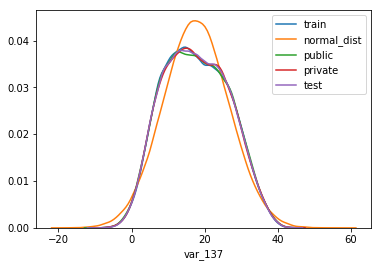

Column var_138


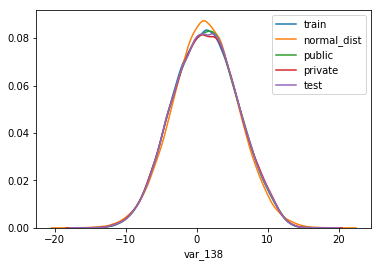

Column var_139


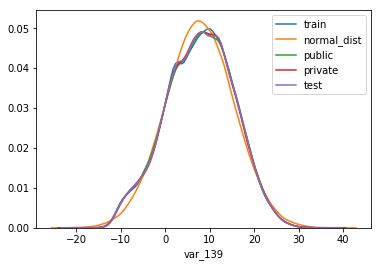

Column var_140


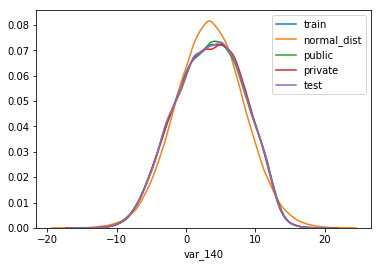

Column var_141


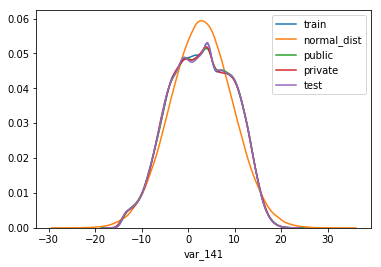

Column var_142


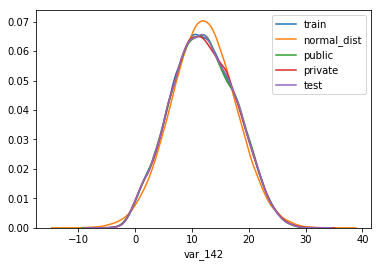

Column var_143


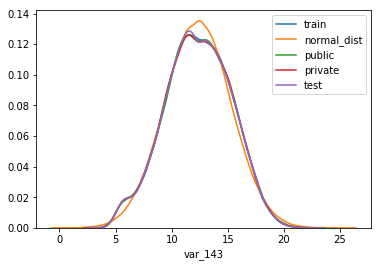

Column var_144


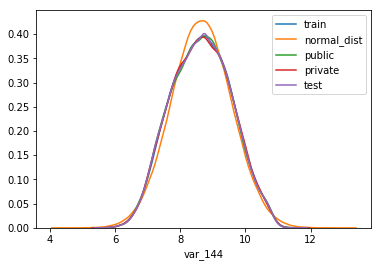

Column var_145


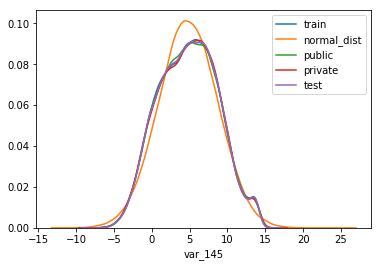

Column var_146


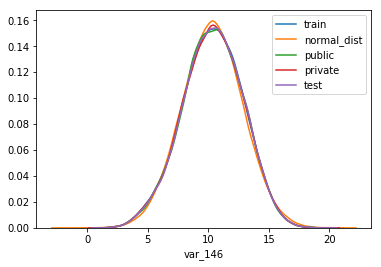

Column var_147


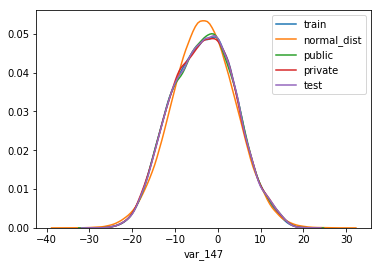

Column var_148


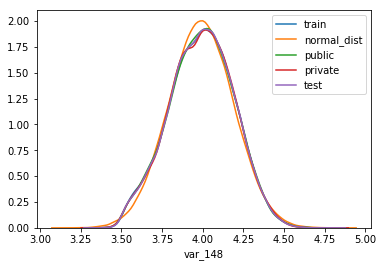

Column var_149


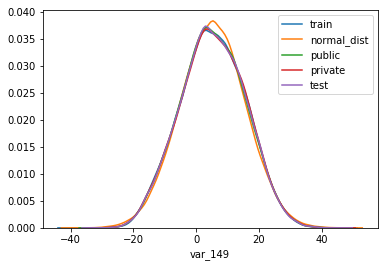

Column var_150


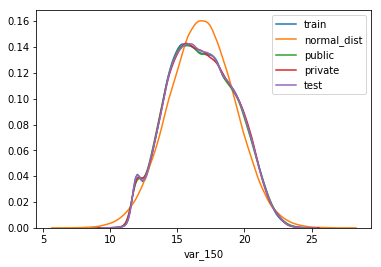

Column var_151


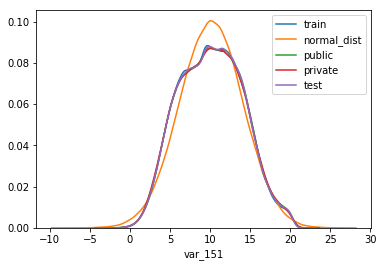

Column var_152


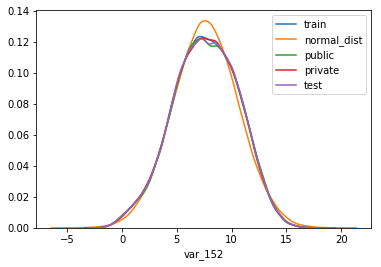

Column var_153


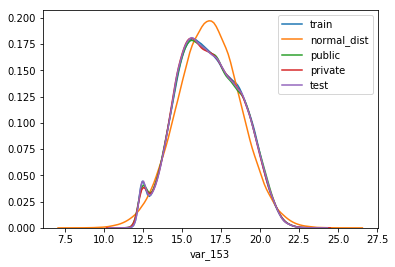

Column var_154


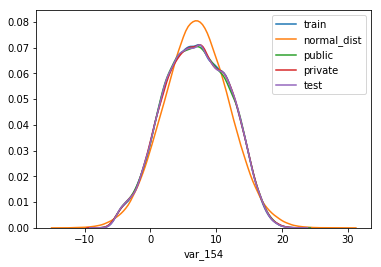

Column var_155


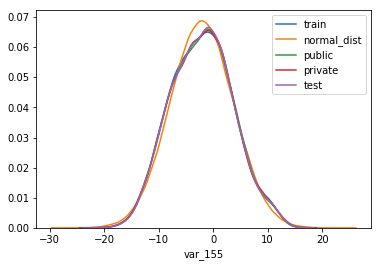

Column var_156


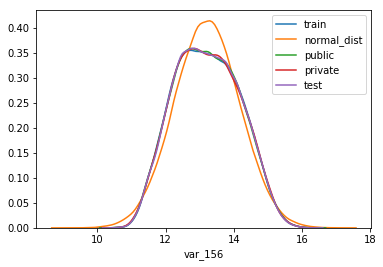

Column var_157


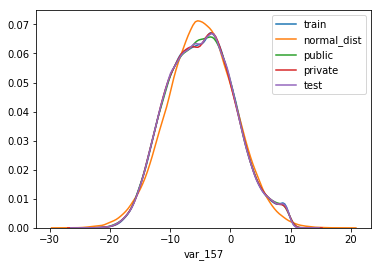

Column var_158


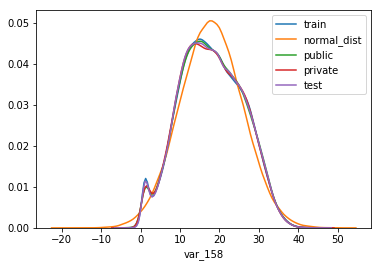

Column var_159


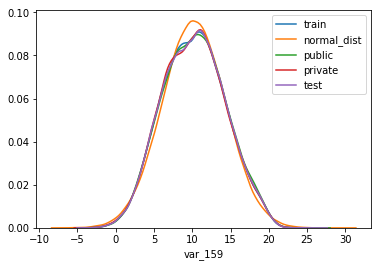

Column var_160


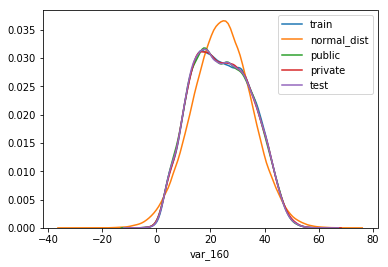

Column var_161


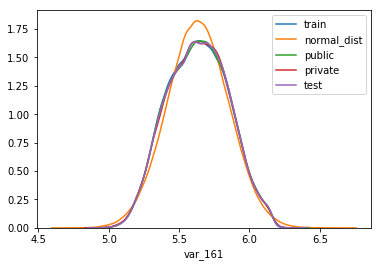

Column var_162


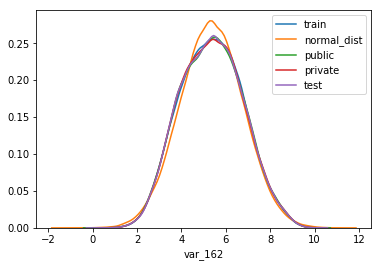

Column var_163


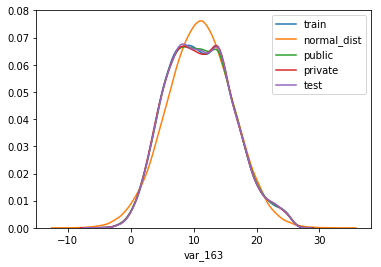

Column var_164


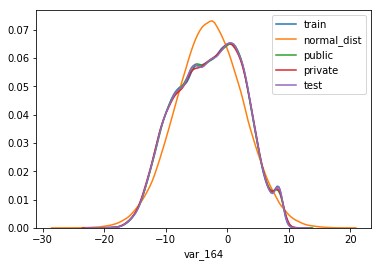

Column var_165


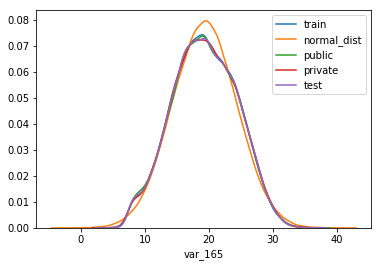

Column var_166


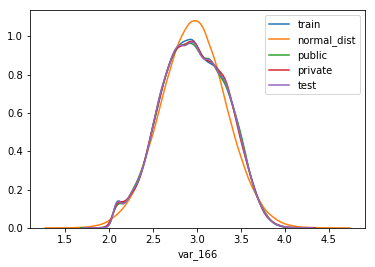

Column var_167


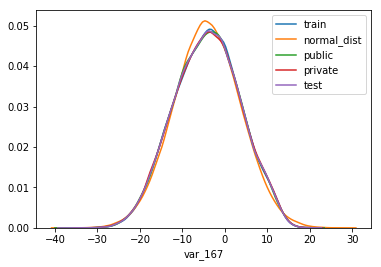

Column var_168


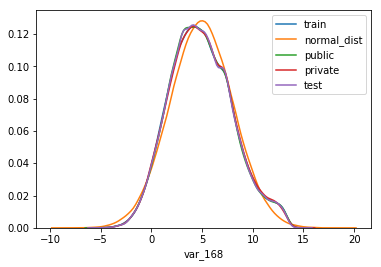

Column var_169


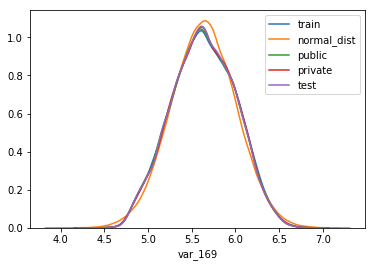

Column var_170


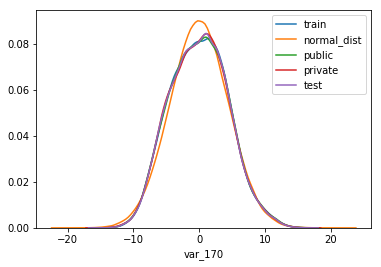

Column var_171


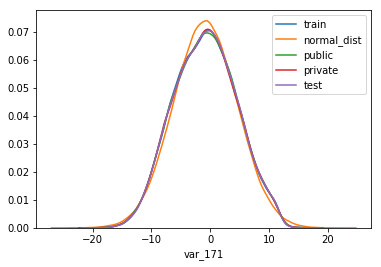

Column var_172


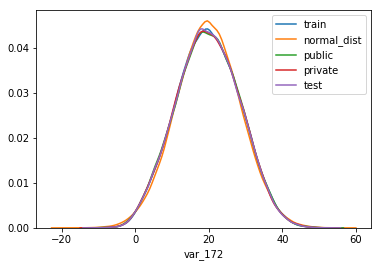

Column var_173


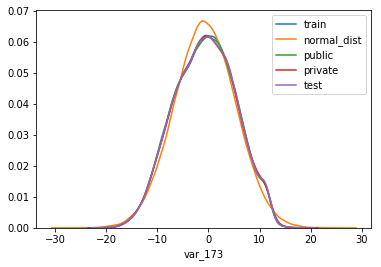

Column var_174


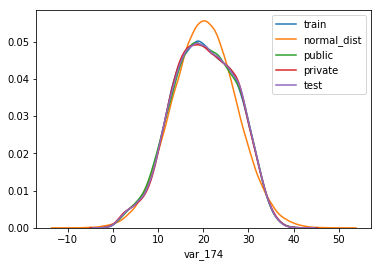

Column var_175


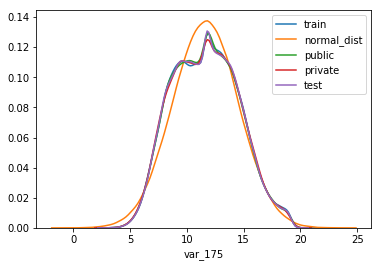

Column var_176


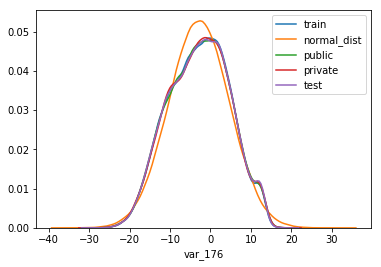

Column var_177


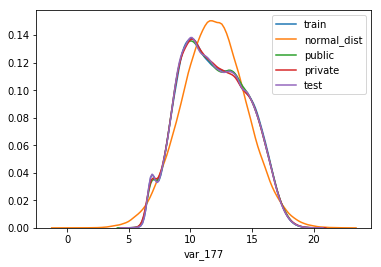

Column var_178


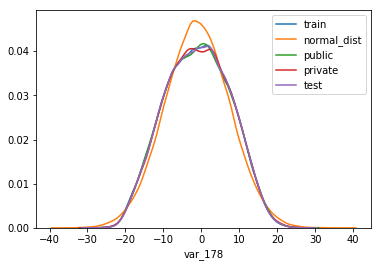

Column var_179


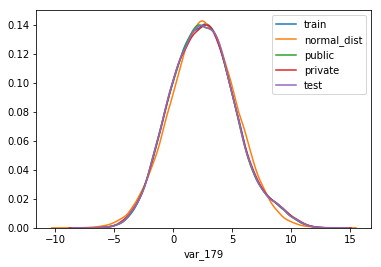

Column var_180


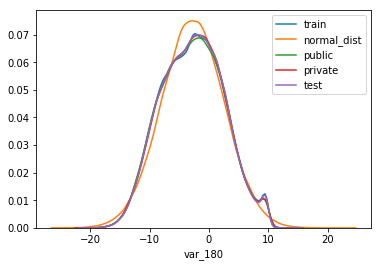

Column var_181


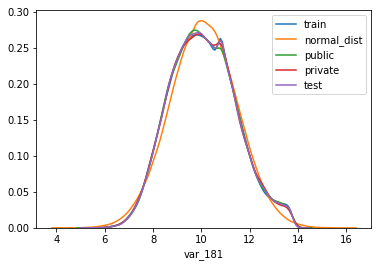

Column var_182


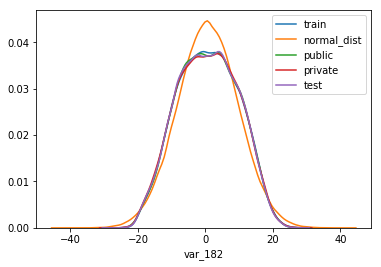

Column var_183


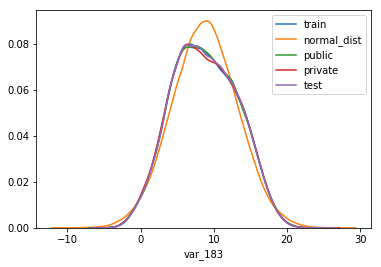

Column var_184


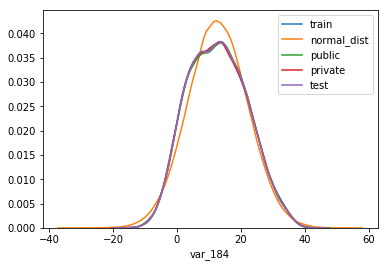

Column var_185


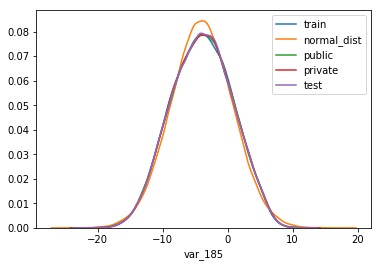

Column var_186


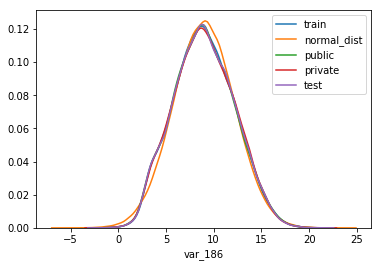

Column var_187


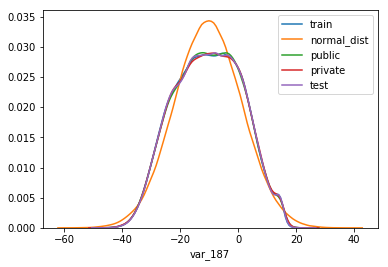

Column var_188


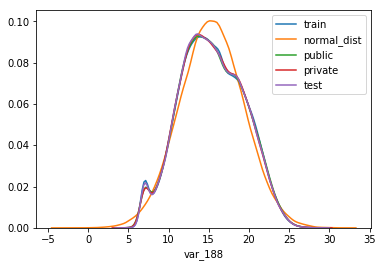

Column var_189


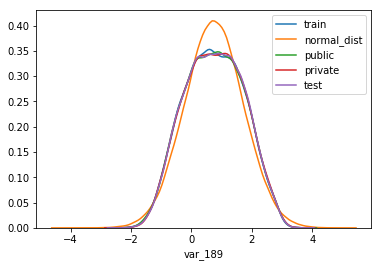

Column var_190


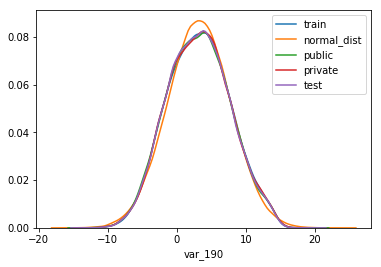

Column var_191


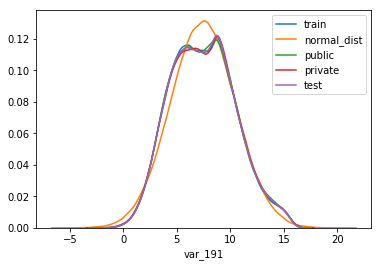

Column var_192


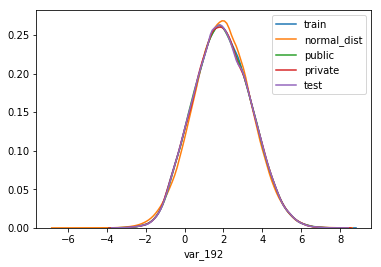

Column var_193


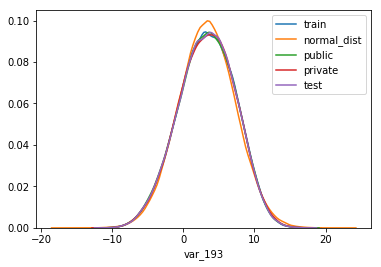

Column var_194


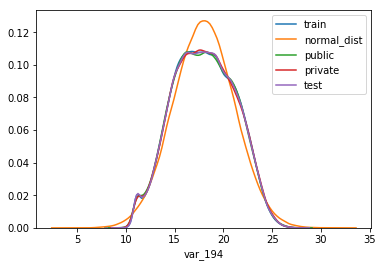

Column var_195


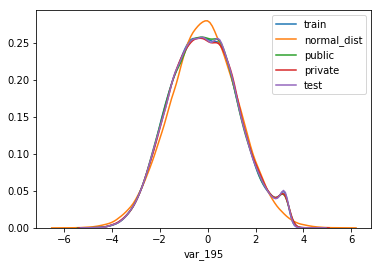

Column var_196


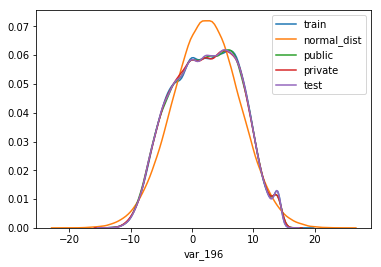

Column var_197


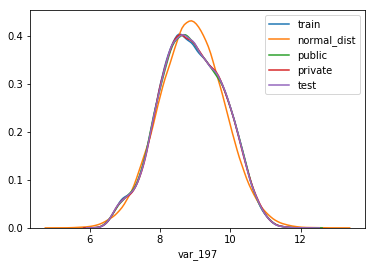

Column var_198


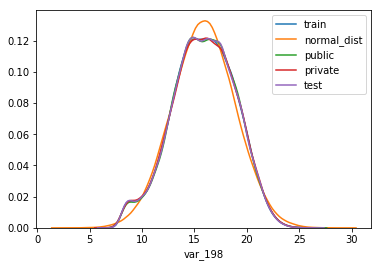

Column var_199


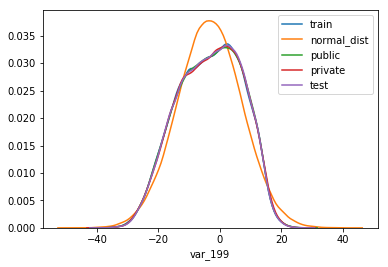

In [13]:
for var in train_df.columns:
    print("Column {}".format(var))
    plt.plot()
    normal_data = train_df[var].mean() + train_df[var].std()*np.random.randn(len(train_df))
    bins, _ = np.histogram(train_df[var],bins='fd')
    sns.distplot(train_df[var], label="train", bins=len(bins), hist=False)
    sns.distplot(normal_data, label="normal_dist", bins=len(bins), hist=False)
    sns.distplot(public_df[var], label="public", bins=len(bins), hist=False)
    sns.distplot(private_df[var], label="private", bins=len(bins), hist=False)
    sns.distplot(test_df[var], label="test", bins=len(bins), hist=False)
    plt.legend()
    plt.show()

In [112]:
def fractional_part(train_df, test_df):
    df = pd.concat([train_df, test_df])
    for col in df.columns:
        df[col+"_frac_part"] = df[col].apply(lambda x: x-int(x))
    return df[:len(train_df)], df[len(train_df):]

In [133]:
def fractional_part_density(train_df, test_df, columns, target):
    for col in columns:
        col_name = col+"_frac_part"
        hist, bins = np.histogram(train_df[col_name],bins='fd')
        n_bins=len(hist)
        
        hist_1, bins_1 = np.histogram(train_df[target==1][col_name],bins=n_bins)
        hist_1, bins_1 = pad_bins(hist_1, bins_1)
        hist_1 = hist_1/hist_1.sum()
        
        hist_0, bins_0 = np.histogram(train_df[target==0][col_name],bins=n_bins)
        hist_0, bins_0 = pad_bins(hist_0, bins_0)
        hist_0 = hist_0/hist_0.sum()
        
        train_df[col+"_frac_1_density"] = [hist_1[np.searchsorted(bins_1,x)-1] for x in train_df[col_name]]
        test_df[col+"_frac_1_density"] = [hist_1[np.searchsorted(bins_1,x)-1] for x in test_df[col_name]]

        train_df[col+"_frac_0_density"] = [hist_0[np.searchsorted(bins_0,x)-1] for x in train_df[col_name]]
        test_df[col+"_frac_0_density"] = [hist_0[np.searchsorted(bins_0,x)-1] for x in test_df[col_name]]

        train_df[col+"_frac_target_diff"] = train_df[col+"_frac_1_density"] - train_df[col+"_frac_0_density"]
        test_df[col+"_frac_target_diff"] = test_df[col+"_frac_1_density"] - test_df[col+"_frac_0_density"]

        train_df.drop(columns=[col+"_frac_1_density", col+"_frac_0_density"], inplace=True)
        test_df.drop(columns=[col+"_frac_1_density", col+"_frac_0_density"], inplace=True)
        train_df.drop(columns=[col+"_frac_part"], inplace=True) ###
        test_df.drop(columns=[col+"_frac_part"], inplace=True) ###
    return train_df, test_df

In [101]:
def target_density_difference(train_df, test_df, columns, target):
    for col in columns[:10]:
        print("Column {}".format(col))
        hist, bins = np.histogram(train_df[col],bins='fd')
        n_bins=len(hist)
        
        hist_1, bins_1 = np.histogram(train_df[train_labels==1][col],bins=n_bins)
        hist_1, bins_1 = pad_bins(hist_1, bins_1)
        hist_1 = hist_1/hist_1.sum()
        
        hist_0, bins_0 = np.histogram(train_df[train_labels==0][col],bins=n_bins)
        hist_0, bins_0 = pad_bins(hist_0, bins_0)
        hist_0 = hist_0/hist_0.sum()
        
        train_df[col+"_1_density"] = [hist_1[np.searchsorted(bins_1,x)-1] for x in train_df[col]]
        test_df[col+"_1_density"] = [hist_1[np.searchsorted(bins_1,x)-1] for x in test_df[col]]

        train_df[col+"_0_density"] = [hist_0[np.searchsorted(bins_0,x)-1] for x in train_df[col]]
        test_df[col+"_0_density"] = [hist_0[np.searchsorted(bins_0,x)-1] for x in test_df[col]]

        train_df[col+"_target_diff"] = train_df[col+"_1_density"] - train_df[col+"_0_density"]
        train_df[col+"_target_diff"] += np.random.normal(0,1,len(train_df))/1e4
        test_df[col+"_target_diff"] = test_df[col+"_1_density"] - test_df[col+"_0_density"]

        train_df.drop(columns=[col+"_1_density", col+"_0_density"], inplace=True)
        test_df.drop(columns=[col+"_1_density", col+"_0_density"], inplace=True)
    return train_df, test_df

Column var_0
Target = 1


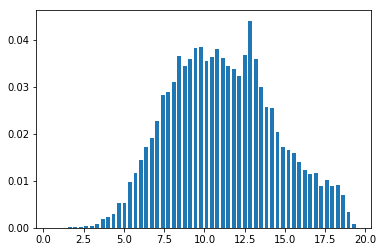

Target = 0


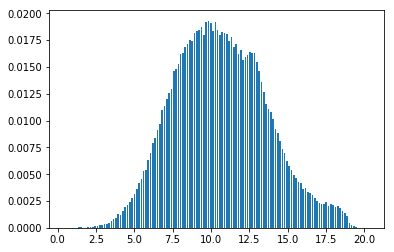

In [102]:
for col in train_df.columns[:1]:
    print("Column {}".format(col))
    hist, bins = np.histogram(train_df[train_labels==1][col],bins='fd')
    hist = hist/hist.sum()
    print("Target = 1")
    plot_hist(hist, bins)
    hist, bins = np.histogram(train_df[train_labels==0][col],bins='fd')
    hist = hist/hist.sum()
    print("Target = 0")
    plot_hist(hist, bins)

In [35]:
train_df.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.7470   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  8.0851   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  5.9525   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  8.2450   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  7.6784   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [36]:
private_df, public_df, synthetic_df = test_df.iloc[private_index], test_df.iloc[public_index], test_df.iloc[synthetic_index]

In [37]:
pure_test_df = pd.concat([private_df, public_df])

In [38]:
pure_test_df.shape

(100000, 200)

In [39]:
def scale_cols(train_df, test_df):
    for col in train_df.columns:
        mean = train_df[col].mean()
        std = train_df[col].std()
        train_df[col] = (train_df[col] - mean)/std
        test_df[col] = (test_df[col] - mean)/std
    return train_df, test_df

In [40]:
def num_bins(train_df, test_df):
    df = pd.concat([train_df, test_df])
    bins_dict = {}
    for col in df.columns:
        hist, bins = np.histogram(df[col],bins='fd')
        n_bins=len(hist)
        bins_dict[col] = n_bins
    return bins_dict

In [41]:
train_df, pure_test_df = scale_cols(train_df, pure_test_df)

In [43]:
bins_dict = num_bins(train_df, pure_test_df)

In [44]:
sorted_col_bins = sorted(bins_dict.items(), key=lambda x:x[1])

In [45]:
unique_bins_dict = {}
for col, bins in sorted_col_bins:
    if bins in unique_bins_dict:
        unique_bins_dict[bins].append(col)
    else:
        unique_bins_dict[bins] = [col]

In [68]:
count = 0
for k, v in unique_bins_dict.items():
    if len(v) > 2:
        print("Bin size {}".format(k))
        #plt.plot()
        train_df["var_"+str(200+count)] = np.zeros_like(train_df["var_0"])
        test_df["var_"+str(200+count)] = np.zeros_like(test_df["var_0"])
        
        train_df["var_"+str(200+count+1)] = np.ones_like(train_df["var_0"])
        test_df["var_"+str(200+count+1)] = np.ones_like(test_df["var_0"])
        for col in v:
            train_df["var_"+str(200+count)] += train_df[col]
            test_df["var_"+str(200+count)] += test_df[col]
            
            train_df["var_"+str(200+count+1)] *= train_df[col]
            test_df["var_"+str(200+count+1)] *= test_df[col]
            #sns.distplot(train_df[col], label=col, bins=k, hist=False)
            #sns.distplot(train_df[train_labels==1][col], label=col+" target=1", bins=k, hist=False)
            #sns.distplot(train_df[train_labels==0][col], label=col+" target=0", bins=k, hist=False)
        #plt.legend()
        #plt.show()
        count += 2

Bin size 129
Bin size 132
Bin size 134
Bin size 135
Bin size 136
Bin size 137
Bin size 138
Bin size 140
Bin size 142
Bin size 143
Bin size 144
Bin size 145
Bin size 146
Bin size 147
Bin size 148
Bin size 149
Bin size 150
Bin size 151
Bin size 152
Bin size 153
Bin size 154
Bin size 155
Bin size 156
Bin size 158
Bin size 159
Bin size 160
Bin size 161
Bin size 163
Bin size 165
Bin size 166
Bin size 167
Bin size 170
Bin size 171
Bin size 172
Bin size 177
Bin size 178
Bin size 179
Bin size 180
Bin size 182
Bin size 186


In [69]:
train_df.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0 -0.577100 -1.273734  0.451706 -0.833707  0.235571 -0.536429 -0.334925   
1  0.269958 -0.622136  1.190357 -0.688845  0.790973  1.539897  0.244461   
2 -0.681112 -0.276066  0.516987  0.536515 -0.305476 -0.511032  1.769834   
3  0.125158 -0.129425 -0.667574  0.195354  0.927990  0.410671  0.500632   
4 -0.277303  0.035610  0.817681 -0.077829  0.738605  0.955572  0.613370   

      var_7     var_8     var_9    ...      var_270   var_271   var_272  \
0  0.608749 -1.561576 -1.473792    ...     0.588166  0.000851  2.006759   
1 -0.003525  0.858972  0.419299    ...    -1.563856  0.044922  2.095007   
2 -0.564748 -1.561366 -1.307405    ...     1.987924  0.117688 -0.205880   
3 -0.474200 -1.843906  0.548765    ...     0.288466  0.006729 -1.427925   
4  0.791542  1.794748  0.090006    ...     1.393480 -0.465909 -1.351258   

    var_273   var_274   var_275   var_276   var_277   var_278   var_279  
0  0.151696 -0.229600  0.009266  0.449464 -0.021441  1.975341 -0.362022  
1 -1.000180  2.462859 -0.031363 -0.805916  1.330466 -2.398606  0.260122  
2  0.000686 -1.631082 -0.028102 -0.720263 -0.409424  1.091442 -0.132239  
3 -0.094620 -1.106333 -0.024035  0.568531 -0.845591  1.077325 -0.077003  
4  0.195579 -0.549588 -0.000793 -0.671381 -0.049709  1.625118  0.069344  

[5 rows x 280 columns]

Column var_200


C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


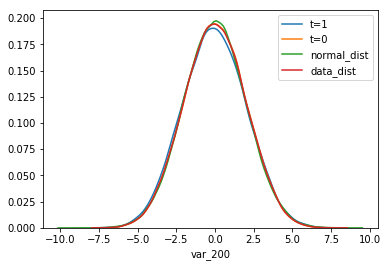

Column var_201


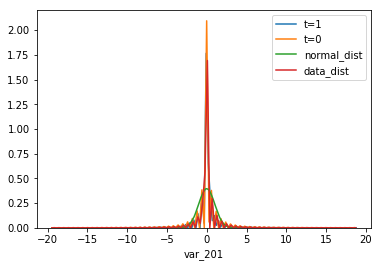

Column var_202


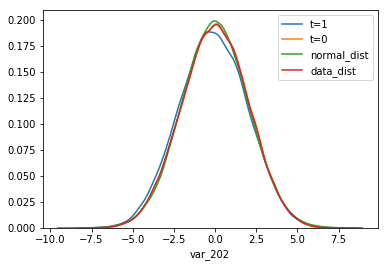

Column var_203


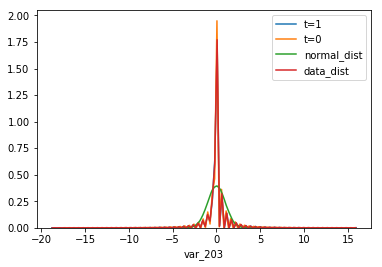

Column var_204


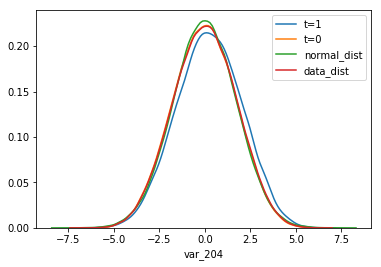

Column var_205


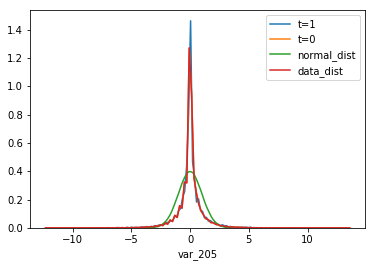

Column var_206


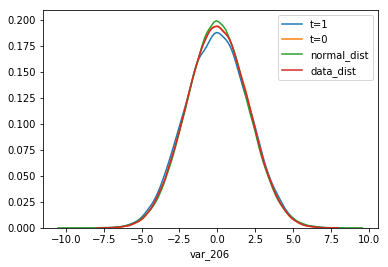

Column var_207


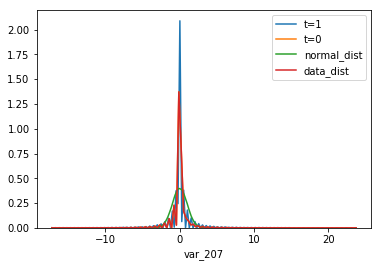

Column var_208


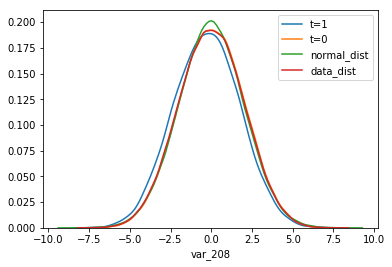

Column var_209


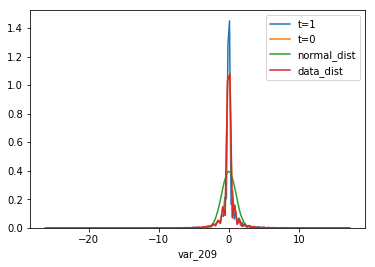

Column var_210


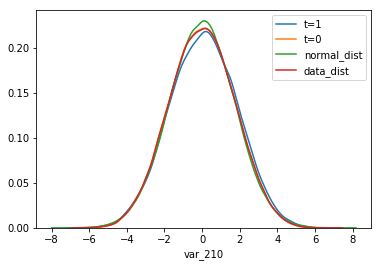

Column var_211


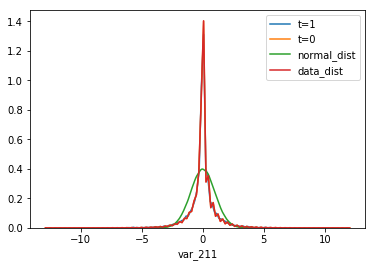

Column var_212


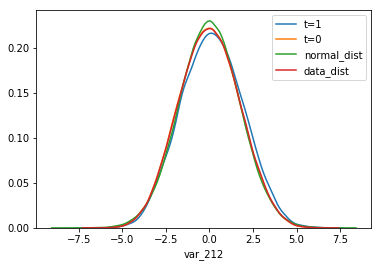

Column var_213


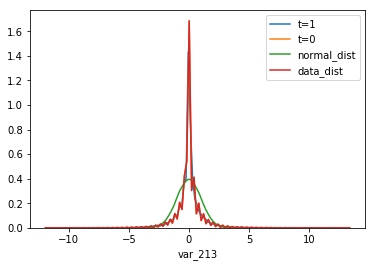

Column var_214


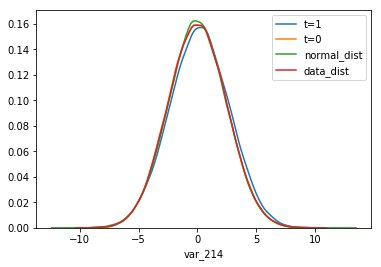

Column var_215


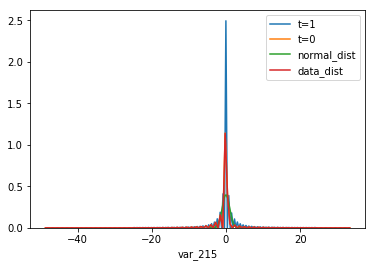

Column var_216


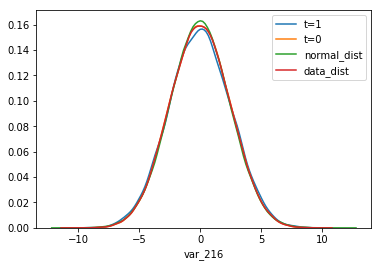

Column var_217


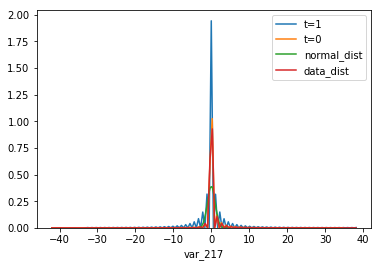

Column var_218


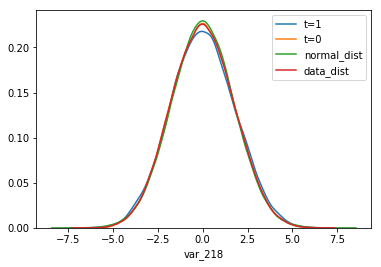

Column var_219


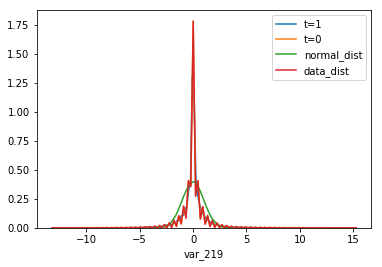

Column var_220


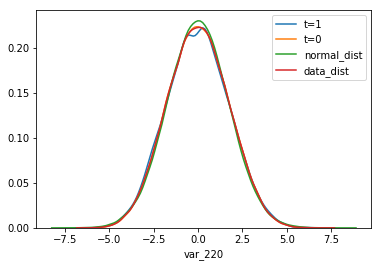

Column var_221


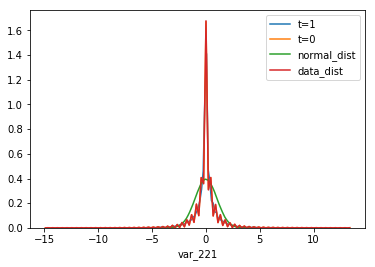

Column var_222


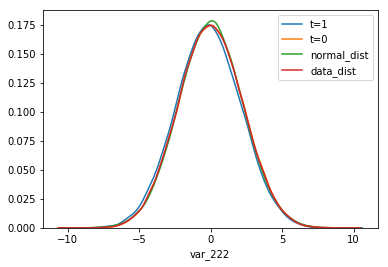

Column var_223


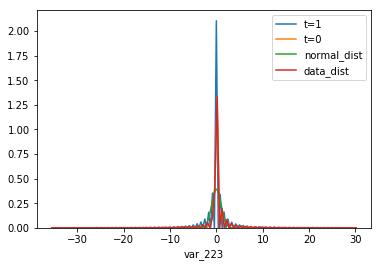

Column var_224


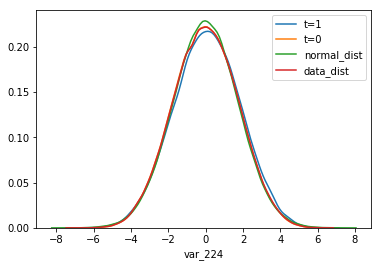

Column var_225


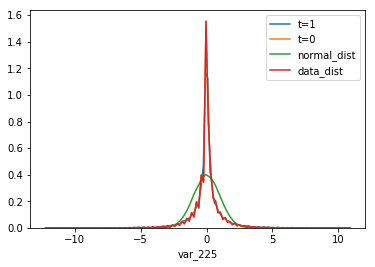

Column var_226


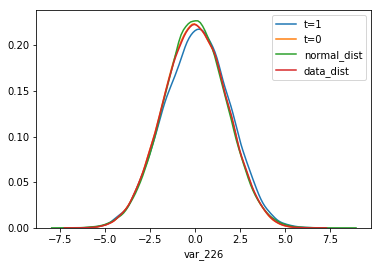

Column var_227


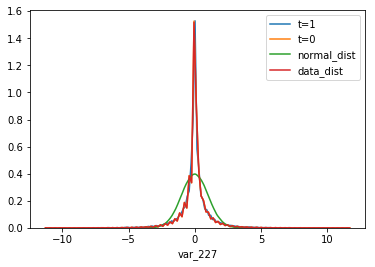

Column var_228


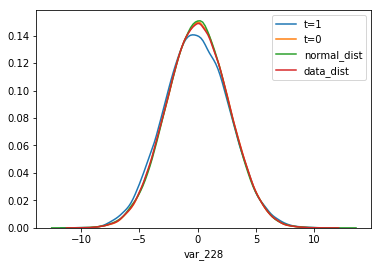

Column var_229


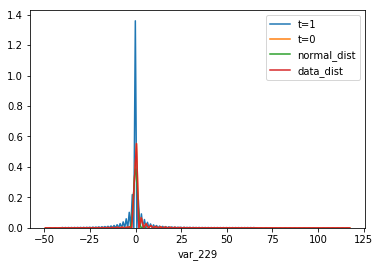

Column var_230


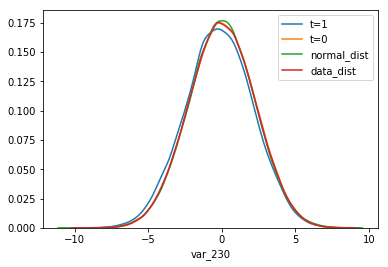

Column var_231


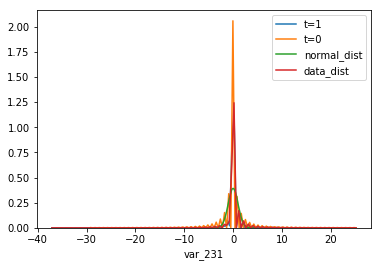

Column var_232


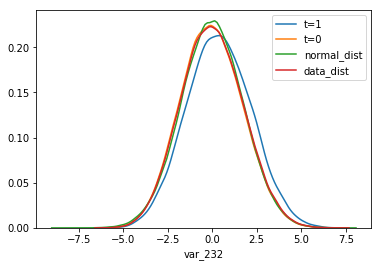

Column var_233


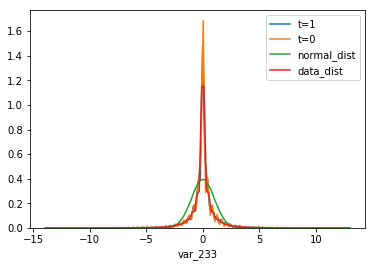

Column var_234


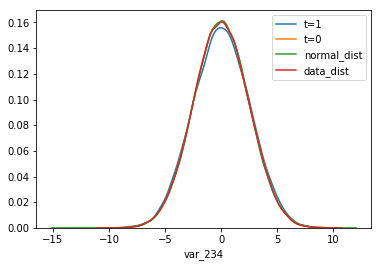

Column var_235


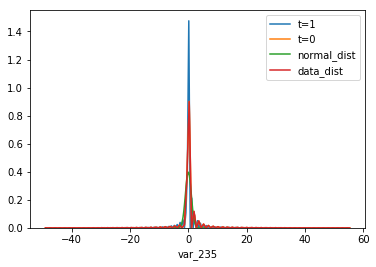

Column var_236


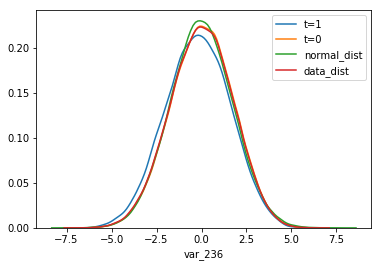

Column var_237


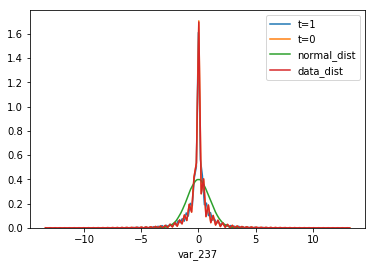

Column var_238


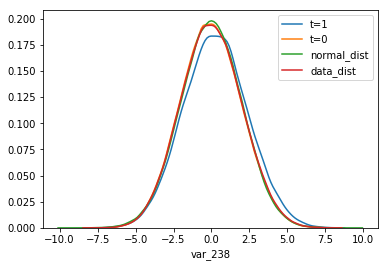

Column var_239


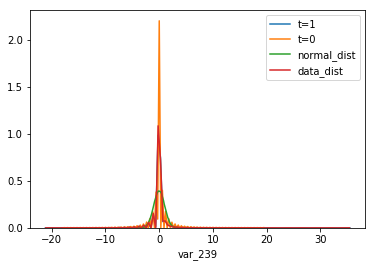

Column var_240


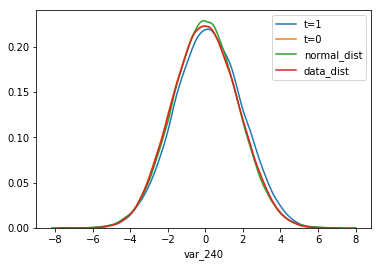

Column var_241


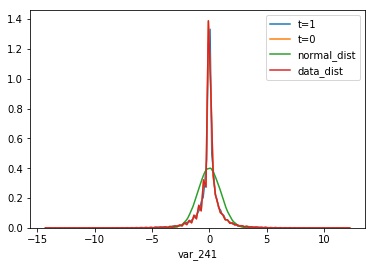

Column var_242


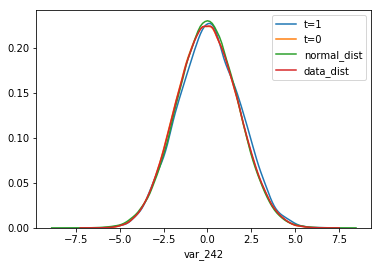

Column var_243


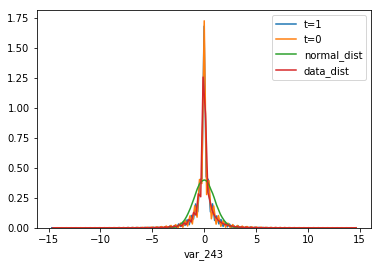

Column var_244


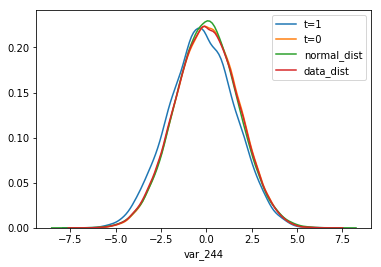

Column var_245


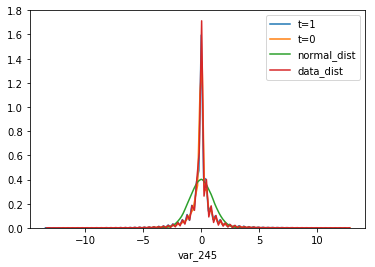

Column var_246


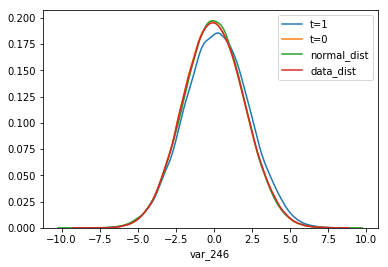

Column var_247


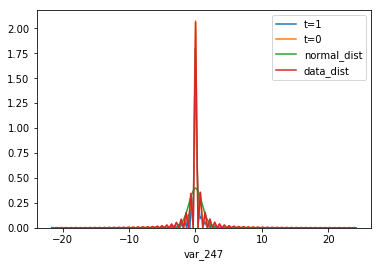

Column var_248


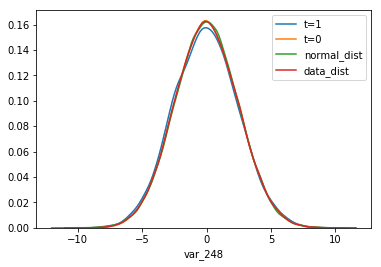

Column var_249


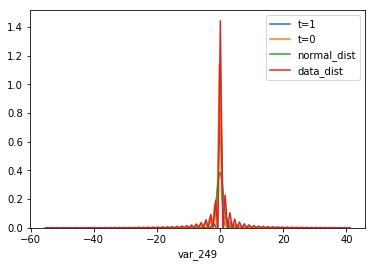

Column var_250


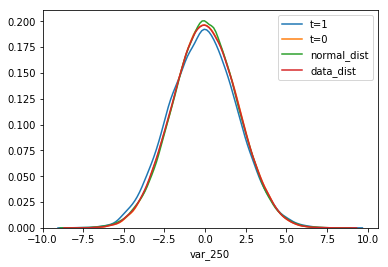

Column var_251


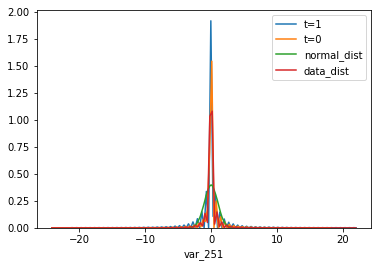

Column var_252


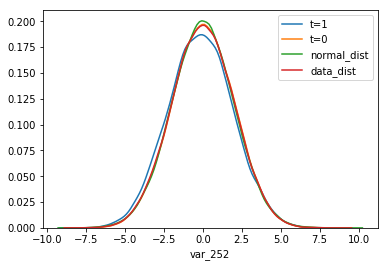

Column var_253


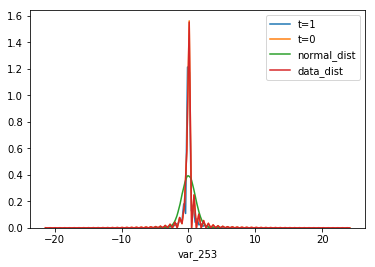

Column var_254


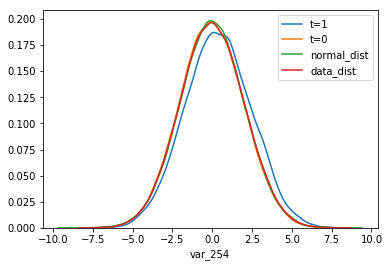

Column var_255


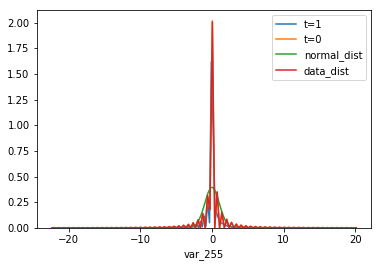

Column var_256


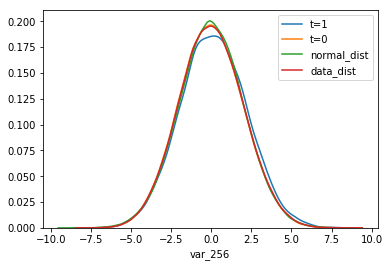

Column var_257


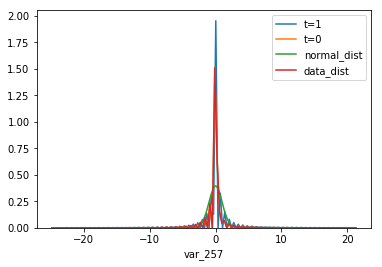

Column var_258


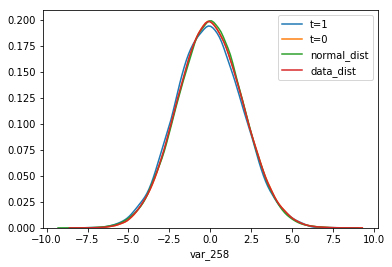

Column var_259


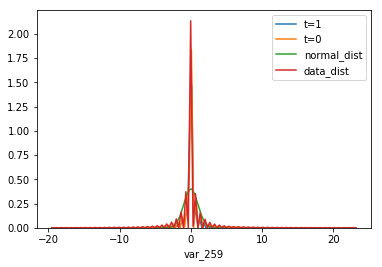

Column var_260


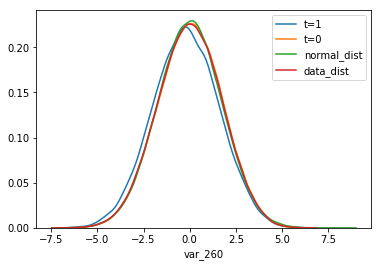

Column var_261


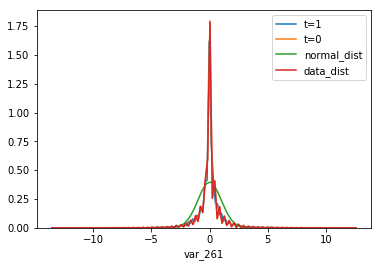

Column var_262


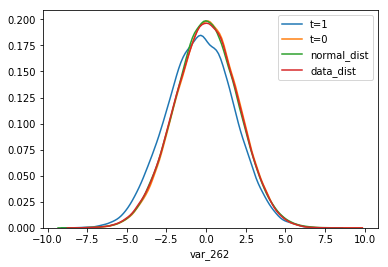

Column var_263


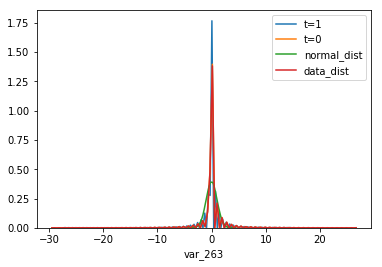

Column var_264


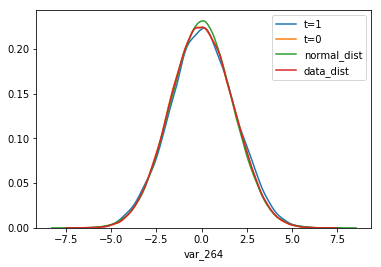

Column var_265


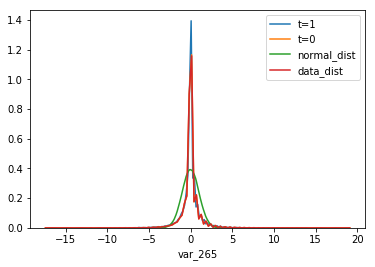

Column var_266


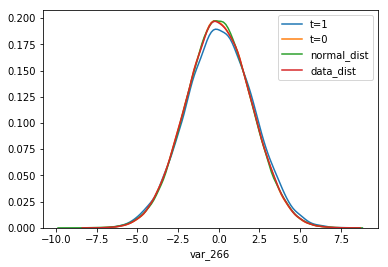

Column var_267


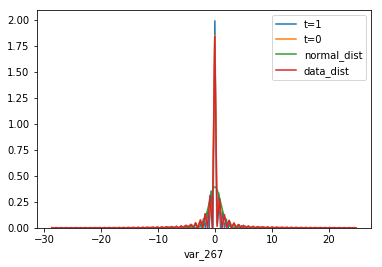

Column var_268


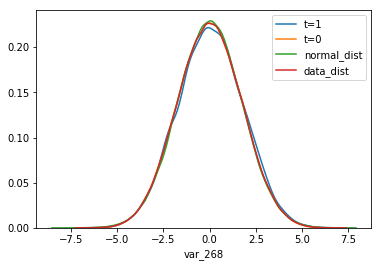

Column var_269


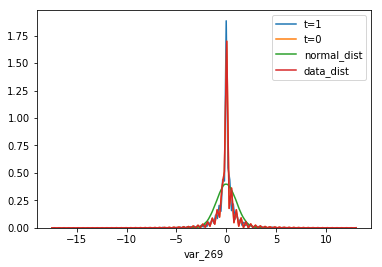

Column var_270


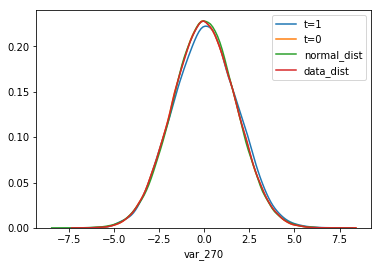

Column var_271


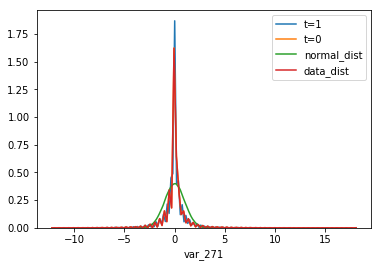

Column var_272


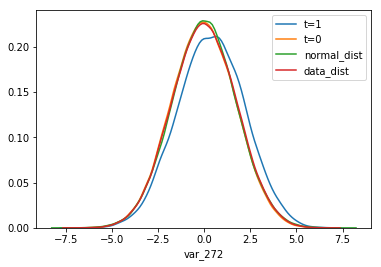

Column var_273


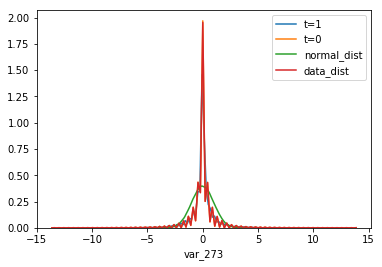

Column var_274


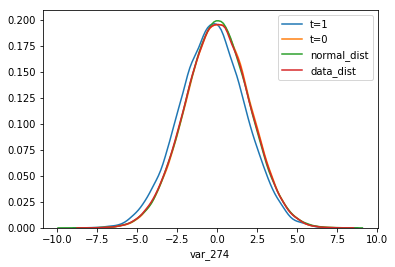

Column var_275


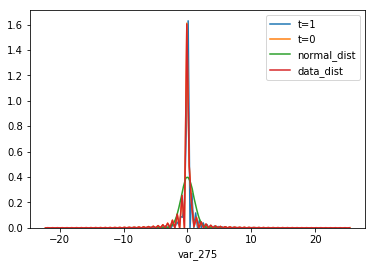

Column var_276


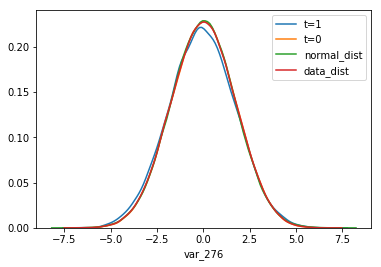

Column var_277


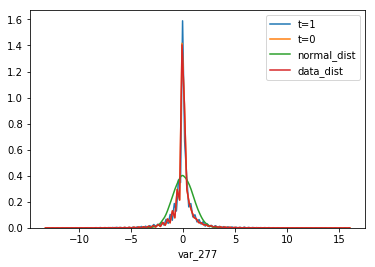

Column var_278


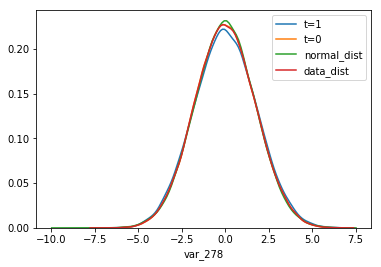

Column var_279


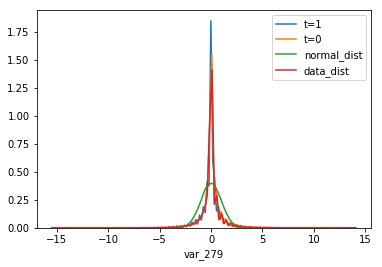

In [70]:
for var in train_df.columns[200:]:
    print("Column {}".format(var))
    plt.plot()
    normal_data = train_df[var].mean() + train_df[var].std()*np.random.randn(len(train_df))
    bins, _ = np.histogram(train_df[var],bins='fd')
    sns.distplot(train_df[train_labels==1][var], label="t=1", bins=len(bins), hist=False)
    sns.distplot(train_df[train_labels==0][var], label="t=0", bins=len(bins), hist=False)
    sns.distplot(normal_data, label="normal_dist", bins=len(bins), hist=False)
    sns.distplot(train_df[var], label="data_dist", bins=len(bins), hist=False)
    plt.legend()
    plt.show()

In [71]:
def combination_features(train_df, test_df):
    def scale_cols(train_df, test_df):
        new_train = pd.DataFrame()
        new_test = pd.DataFrame()
        for col in train_df.columns:
            mean = train_df[col].mean()
            std = train_df[col].std()
            new_train[col] = (train_df[col] - mean)/std
            new_test[col] = (test_df[col] - mean)/std
        return new_train, new_test

    def num_bins(train_df, test_df):
        df = pd.concat([train_df, test_df])
        bins_dict = {}
        for col in df.columns:
            hist, bins = np.histogram(df[col],bins='fd')
            n_bins=len(hist)
            bins_dict[col] = n_bins
        return bins_dict

    new_train_df, new_test_df = scale_cols(train_df, test_df)
    bins_dict = num_bins(new_train_df, new_test_df)
    sorted_col_bins = sorted(bins_dict.items(), key=lambda x:x[1])

    unique_bins_dict = {}
    for col, bins in sorted_col_bins:
        if bins in unique_bins_dict:
            unique_bins_dict[bins].append(col)
        else:
            unique_bins_dict[bins] = [col]
        
    count = 0
    for k, v in unique_bins_dict.items():
        if len(v) > 2:
            print("Bin size {}".format(k))
            train_df["var_"+str(200+count)] = np.zeros_like(train_df["var_0"])
            test_df["var_"+str(200+count)] = np.zeros_like(test_df["var_0"])
            
            train_df["var_"+str(200+count+1)] = np.ones_like(train_df["var_0"])
            test_df["var_"+str(200+count+1)] = np.ones_like(test_df["var_0"])
            for col in v:
                train_df["var_"+str(200+count)] += new_train_df[col]
                test_df["var_"+str(200+count)] += new_test_df[col]
                
                train_df["var_"+str(200+count+1)] *= new_train_df[col]
                test_df["var_"+str(200+count+1)] *= new_test_df[col]
            count += 2
    
    return train_df, test_df

In [76]:
train_df.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.7470   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  8.0851   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  5.9525   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  8.2450   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  7.6784   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [77]:
train_df, test_df = combination_features(train_df, test_df)

Bin size 142
Bin size 146
Bin size 148
Bin size 149
Bin size 151
Bin size 155
Bin size 156
Bin size 158
Bin size 159
Bin size 160
Bin size 161
Bin size 162
Bin size 163
Bin size 164
Bin size 165
Bin size 166
Bin size 168
Bin size 170
Bin size 174
Bin size 176
Bin size 177
Bin size 179
Bin size 181
Bin size 182
Bin size 183
Bin size 187
Bin size 188
Bin size 189
Bin size 195
Bin size 196
Bin size 198
Bin size 201
